In [1]:
# Add lib input sys.path
import os
import sys
import time

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial
import h5py
from scipy.spatial import distance

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from matplotlib.colors import ListedColormap
import libs.linear_models as lm
import libs.data_util as data
import libs.nn as nn
import libs.plot as myplot

%matplotlib inline

#### Exercise 6.1

* (a) Let $x=(0,1), x'=(0.01,1)$, then we have the Euclidean distance $d(x,x')=\|x-x'\| = 0.01$ and the cosine similarity $\text{CosSim}(x,x')=\frac{x\cdot x'}{\|x\|\|x'\|} \approx 0.99995$

They have very high cosine similarity but very low Euclidean distance similarity.

Let $x=(1,0), x'=(-1,0)$, then we have the Euclidean distance $d(x,x')=\|x-x'\| = 2$ and the cosine similarity $\text{CosSim}(x,x')=\frac{x\cdot x'}{\|x\|\|x'\|} = -1$

In [4]:
#### Exercise 6.1
x = np.array([0,1])
y = np.array([0.01, 1])

d = np.linalg.norm(x-y)
print('Euclidean distance: ', d)

xdoty = np.dot(x,y)
cos = xdoty/np.linalg.norm(x)/np.linalg.norm(y)
print('Cosine similarity: ', cos)

Euclidean distance:  0.01
Cosine similarity:  0.9999500037496877


#### Exercise 6.1

* (b) Suppose we have $x,y$ w.r.t. the original origin. If the origin of the coordinate system changes, suppose we move the origin to $P$, then we have w.r.t. the new origin, $x'=x-P, y'=y-P$, so it's easy to see that the Euclidean distance similarity doesn't change. The cosine similarity however changes, this can be seen by checking two vectors perpendicular to each other, if we move to a new origin, they don't perpendicular to each other anymore. 

This puts some restriction on the choice of features, if we want to use cosine similarity, we can't change their magnitude, e.g. mean subtraction, this may affect some algorithms which may perform badly given large differences between different features. 

#### Exercise 6.2

Given a test point $(x,y)$ (Generated from $P(x)$ and $\pi(x)=P[y=1|x]$) and the target function $f(x)$, The probability of error on a test point $x$ is: 

\begin{align*}
e(f(x)) &=P[f(x)\ne y] \\
&= P[f(x)=1,y=-1] + P[f(x)=-1,y=1] \\
&= P(y=-1)1(\pi(x)\ge \frac{1}{2}) + P(y=1)1(\pi(x) < \frac{1}{2}) \\
&= (1-\pi(x))1(\pi(x)\ge \frac{1}{2}) + \pi(x)1(\pi(x) < \frac{1}{2}) \\
&= \min(\pi(x), 1-\pi(x))\\
\end{align*}

For any other hypothesis $h$ (deterministic or not), we apply the same calculation, and have 

\begin{align*}
e(h(x)) &=P[h(x)\ne y] \\
&= P[h(x)=1,y=-1] + P[h(x)=-1,y=1] \\
&= P(y=-1)P(h(x)=1) + P(y=1)(1-P(h(x)=1)) \\
&= (1-\pi(x))P_1 + \pi(x)(1-P_1) \\
&= \pi(x)+(1-2\pi(x))P_1\\
\end{align*}

Where $P_1 = P(h(x)=1)$, If $\pi(x) \ge \frac{1}{2}$, then $1-2\pi(x) \le 0$, and $\pi(x)+(1-2\pi(x))P_1 \ge \pi(x) + (1-2\pi(x)) = 1-\pi(x)$, since $P_1 \le 1$.

If $\pi(x) < \frac{1}{2}$, then $1-2\pi(x) > 0$, and $\pi(x)+(1-2\pi(x))P_1 \ge \pi(x)$, since $P_1 \ge 0$. 

So we conclude that: $e(h(x)) \ge e(f(x))$.

#### Exercise 6.3 TODO

#### Exercise 6.4

The method will always pick $k=1$, where the $E_{in}=0$ for any data.  So the hypothesis set doesn't depend on the data. It can't find usefule $k$.

#### Exercise 6.5

* (a) Since we are selecting hypothesis from a fixed set of $\mathcal{H}_{train}$, there are $N-K$ hypotheses and the validation data set is the 'input data set', which has a size of $K$. We apply the generalization bound equation (2.1), and for any $g^-_k, k=1,2,\dots,N-K$, we have 

$E_{out}(g^-_k) \le E_{val}(g^-_k) + \sqrt{\frac{1}{2K}\ln\frac{2(N-K)}{\delta}}$

If we assume $\frac{K}{\log(N-K)}\to \infty$, then we have $E_{out}(g^-_k) \approx E_{val}(g^-_k)$

Since $g^-$ is the hypothesis with minimum validation error $E_{val}(g^-)$, so we have 

$E_{out}(g^-) \approx E_{val}(g^-) \le E_{val}(g^-_*) \approx E_{out}(g^-_*)$

On the other hand, $g^-_*$ minimizes $E_{out}$, so we always have $E_{out}(g^-_*) \le E_{out}(g^-)$

Compare the two inequalities, we conclude $E_{out}(g^-) \approx E_{out}(g^-_*)$.


* (b) If $N-K\to \infty$, according to Theorem 6.2, we can find a $k(N-K)$, such that $k(N-K)\to \infty$ and $\frac{k(N-K)}{N-K} \to 0$, then we know that $E_{in}(g^-_k) \to E_{out}(g^-_k)$ and $E_{out}(g^-_k) \to E^*_{out}$.

Since $E^*_{out}$ is the optimal out-of-sample error we can ever achieve, so we know that $E_{out}(g^-_k) \approx E_{out}(g^-_*)$, by problem (a), we thus conclude $E_{out}(g^-) \approx E^*_{out}$

* If we used the $k^--NN$ rule on the full data set $\mathcal{D}$, we would see performance improvement because the learning curve tells us we should use more data to achieve better performance. 

#### Exercise 6.6

In a 10-fold cross validation, suppose we have data folds as $D_1, \dots, D_{10}$, each fold will have $\frac{N}{10}$ data points. For a given $k$ and a given fold $D_i$, for each point $x$ in $D_i$, we need compute its distance with all other points in $d$ dimension, which requires $O(Nd)$ computations. We then need select the smallest $k$ distances, which requires $O(N\log k)$ computations. So for each point in fold $D_i$, we need $O(Nd+N\log k)$ computations. 

We need to do the same for all $\frac{N}{10}$ points in fold $D_i$, so the total computation for a given fold is $O(\frac{N}{10}(Nd+N\log k))$, with 10 folds, we have total cost of $O(N^2d+N^2\log k)$ for a given $k$.


Now sum up over $k$, we have the total cost

$T=\sum^{\frac{N+1}{2}}_{j=1} O(N^2d+N^2\log (2j-1)) = O(N^2d\frac{N+1}{2}) + O(N^2\sum^{\frac{N+1}{2}}_{j=1}\log (2j-1))$

The first term is approximately on the order of $O(N^3d)$

For the second term, we have $\sum^{\frac{N+1}{2}}_{j=1}\log (2j-1)) \approx \sum^{\frac{N+1}{2}}_{j=1}\log (2j)) \approx \frac{N+1}{2}\log 2 + \log (\frac{N+1}{2})!$

By Sterling approximation formula, we have $\ln n! = n\ln n - n + O(\ln n)$, so 

$\log (\frac{N+1}{2})! \approx \frac{N+1}{2}\log \frac{N+1}{2} - \frac{N+1}{2} + O(\log \frac{N+1}{2}) = O(N\log N - N)$

Then $O(N^2\sum^{\frac{N+1}{2}}_{j=1}\log (2j-1)) = O(N^2(N\log N - N)) = O(N^3\log N - N^3)$

Adding up with the first term, we have $T=O(N^3d + N^3\log N)$

#### Exercise 6.7

* (a) If $S$ is not training set consistent, and if $x_*$ is a point which is not training set consistent, so we have $g_S(x_*) \ne g_{\mathcal{D}}(x_*)$. According to CNN heuristic, we can find the nearest data point to $x_*$ which is not in $S$ and has class $g_{\mathcal{D}}(x_*)$. We need to prove that such a point exists.

We first fix the number of nearest neighbors to $k$, and consider the neighborhood of $N_S$ in $S$ and $N_{\mathcal{D}}$ in $\mathcal{D}$, both $N_S$ and $N_{\mathcal{D}}$ have the same number of points, i.e. $k$. 

We say $N_S$ and $N_{\mathcal{D}}$ are not equal to each other, otherwise, $x_*$ won't be an inconsistent point. So there must be some point that is in $N_{\mathcal{D}}$ but not in $N_S$.

Now we say that among these points that not in $S$, there must be a point $x'$ such that $g_{\mathcal{D}}(x') = g_{\mathcal{D}}(x_*)$. 

If no such point exists, then all the points in $N_{\mathcal{D}}$ but not in $N_S$ will have the class $g_S(x_*)$. Suppose the intersection of $N_{\mathcal{D}}$ and $N_S$ has $m$ points, then $k-m$ points in $N_{\mathcal{D}}$ will have class $g_S(x_*)$, when it combines with the intersection of $m$ points, we will definitely find that the class of $x_*$ in $\mathcal{D}$ to be $g_D(x_*)$ = g_S(x_*)$, because $N_S$ is composed of $k-m$ points plus the same $m$ points, but gives $x_*$ a class of $g_S(x_*)$ without requiring the $k-m$ points to be all in class $g_S(x_*)$.

This is the contradiction, so we proved that the CNN heuristic will surely find a point $x'$ that is not in $S$ and has class $g_D(x_*)$$

* (b) Since the set $S$ is a subset of $\mathcal{D}$, so for any of the $k$ nearest neighbors to $x_*$ from $\mathcal{D}$, i.e. $N_{\mathcal{D}}$, if it belongs to $S$, it must belong to the neighbord from $S$ as well, i.e. $N_S$. So the new nearest neighbors added to $S$, will become neighbors of $x_*$ in $N_S$.


* (c) Since there are total $N$ points, from problem (a), each step will add at most 1 point into the original $k$ points in $S$ if $S$ is still not training set consistent, and also the $N$ points is the set of $\mathcal{D}$, which automatically satisfies the training set consistency. So after at most $N-k$ iterations, the CNN heuristic must termiate with a training set consistent $S$.

#### Exercise 6.8

* (a) Pseudo code for the recursive branch and bound search for the nearest neighbor.

  * Given a test point $x$, we search for its nearest neighbor in the data set $D$.
  * We look for algorithm called $F(S, x)$ to find the nearest neighbor of $x$ in a given cluster $S$. Let's initialize with the whole data set as our first cluster $\mathcal{D}$. From clustering algorithm, we should know its two children clusters, their centers, $\mu_1,\mu2$, and radii $r_1,r_2$.
  * Here is how we implement $F(S,x)$:
     1. Set the nearest neighbor be $x_{nn} = \text{None}$ as in python.
     2. If the input cluster has no children cluster, i.e. it has at most 2 data points
       * Find the nearest neighbor in the cluster by computing the distance from $x$ to all the points in the cluster. There are at most 2 computations needed since we assume every cluster with more than 2 points is split into 2 sub-clusters. 
       * Return this point as the nearest neighbor $x_{nn}$ in the input cluster to $x$
     3. Else, suppose the two children clusters of input cluster are: $S_1, S_2$
       * If $\|x-\mu_1\|  \le \|x-\mu_2\|$: 
         * let $x_{nn} = F(S_1, x)$
       * Else: let $x_{nn} = F(S_2, x)$
     4. Now we have $x_{nn}$, let's call the sibling cluster of $S$ be $S^*$, let's compute the bound condition
     5. If $\|x-x_{nn}\| > \| x - \mu^*\| - r^*$: (Need check cluster $S^*$ for the nearest neighbor)
       * $x^*_{nn} = F(S^*, x)$
       * If $\|x-x^*_{nn}\| < \|x-x_{nn}\|$: $x_{nn} = x^*_{nn}$
     6. Return $x_{nn}$
  4. We call $F(S, x)$ with $S =\mathcal{D}$ to get the nearest neighbor in the data set to $x$
  
* (b) If the sub-clusters of a cluster are balanced, and assume the number of data points is power of 2, i.e. $N=2^k$, the maximum depth of the recursive search for a nearest neighbor can be $\log_2 N = k$

* (c) If we have balanced sub-clusters and if the bound conditions always hold, then the if-condition in step 5 will be always False, so we just need to go through $\log_2 N$ steps, each with a computation of $d$ for distance in the $R^d$ space. The total cost is thus $d\log_2 N$

* (d) To apply the branch and bound algorithm to $k$-nearest neighbors, assume that every cluster with more than $k$ points is split into 2 sub-clusters. Instead of search for the neareset neighbor in a cluster, we search for $k$-nearest neighbors in a clusters, then apply the bound condition on the $k$-th neighbor with another cluster. 


#### Exercise 6.9

* (a) $e(f(x)) = P[f(x)\ne y] = \sum^C_{c=1}P[y=c, f(x)\ne c]$, since $f(x) = \text{argmax}_c \pi_c(x)$, suppose $f(x) = m$, where $\pi_m(x) =\max_c \pi_c(x)$, so in the error term, as long as $c_i \ne m$, we'll have $f(x)\ne c$, so we have

$e(f(x)) = \sum^C_{c=1}P[y=c, f(x)\ne c] = \sum_{c\ne m}P[y=c] = \sum_{c\ne m}\pi_c(x) = 1 - \pi_m(x) = \eta(x)$

* (b) Suppose the nearest neighbor for $x$ is $x_{[1]}$

\begin{align*}
e(g_N(x)) &= P[g_N(x)\ne y]  \\
&= \sum^C_{c=1} P[y=c, g_N(x)\ne c] \\
&= \sum^C_{c=1} P[y=c, y_{[1]}\ne c] \\
&= \sum^C_{c=1} P[y=c]P[y_{[1]}\ne c] \\
&= \sum^C_{c=1} \pi_c(x)(1-\pi_c(x_{[1]})) \\
&= \sum^C_{c=1} \pi_c(x) - \pi_c(x)\pi_c(x_{[1]}) \\
&= \sum^C_{c=1} \pi_c(x) - \pi^2_c(x) + \pi^2_c(x) - \pi_c(x)\pi_c(x_{[1]}) \\
&= \sum^C_{c=1} \pi_c(x)(1- \pi_c(x)) + \pi_c(x)(\pi_c(x) - \pi_c(x_{[1]})) \\
&= \sum^C_{c=1} \pi_c(x)(1- \pi_c(x)) + \sum^C_{c=1}\pi_c(x)(\pi_c(x) - \pi_c(x_{[1]})) \\
&= \sum^C_{c=1} \pi_c(x)(1- \pi_c(x)) + \epsilon_N(x) \\
\end{align*}

Observe that 

\begin{align*}
|\epsilon_N(x)| &= |\sum^C_{c=1}\pi_c(x)(\pi_c(x) - \pi_c(x_{[1]}))|\\
&\le \sum^C_{c=1}|\pi_c(x)(\pi_c(x) - \pi_c(x_{[1]}))|\\
&\le \sum^C_{c=1}\pi_c(x)|(\pi_c(x) - \pi_c(x_{[1]}))|\\
&\le \sum^C_{c=1}\pi_c(x)\max_c|(\pi_c(x) - \pi_c(x_{[1]}))|\\
&= \max_c|(\pi_c(x) - \pi_c(x_{[1]}))| \sum^C_{c=1}\pi_c(x)\\
&= \max_c|(\pi_c(x) - \pi_c(x_{[1]}))|\\
\end{align*}

When $N\to \infty$, we expect $\epsilon_N(x) \to 0$ because when the data set gets very large, every point $x$ has a nearest neighbor that is close by. That is, we have $x_{[1]}(x) \to x$ for all $x$. This is the case if $P(x)$ has bounded support. 

By the continuity of $\pi(x)$, This indicates that $\pi_c(x_{[1]}) \to \pi_c(x)$ and since $|\epsilon_N(x)| \le |\max_c|(\pi_c(x) - \pi_c(x_{[1]}))||$, it follows that $\epsilon_N(x) \to 0$.

So we conclude that $e(g_N(x)) \to \sum^C_{c=1} \pi_c(x)(1- \pi_c(x))$ when $N\to \infty$ with high probability according to the law of large number.


* (c) We first prove that for $C$ numbers of $a_i,i=1,\dots,C$, we have $C\sum a^2_i \ge (\sum a_i)^2$. This can be proved by notice that for $a_i$, we always have 

\begin{align*}
\sum^C_{i=1}\sum^C_{j=1} (a_i - a_j)^2 &\ge 0\\
\sum^C_{i=1}\left(Ca^2_i + \sum^C_{j=1} a^2_j - \sum^C_{j=1}2a_i a_j\right) &\ge 0 \\
2C\sum^C_{i=1}a^2_i - 2\sum^C_{i=1}a_i\sum^C_{j=1}a_j&\ge 0 \\
C\sum^C_{i=1}a^2_i &\ge (\sum^C_{i=1}a_i)^2\\
\end{align*}

Since we also have $\sum a_i = 1$, apply above inequality to $a_2,a_3,\dots, a_C$, we have


$(C-1)\sum_{i\ne 1} a^2_i \ge (\sum_{i \ne 1} a_i)^2$, add $(C-1)a^2_1$ to both sides we have

$(C-1)\sum a^2_i \ge (C-1)a^2_1 + (\sum_{i \ne 1} a_i)^2 = (C-1)a^2_1 + (1-a_1)^2$. Divide both sides by $C-1$, we have

$\sum a^2_i \ge a^2_1 + \frac{(1-a_1)^2}{C-1}$. 

Now take expectation w.r.t. $x$ on $g_N(x)$, we have 

\begin{align*}
E_{out}(g_N(x)) &= E_{out}[\sum^C_{c=1}\pi_c(x)\left(1-\pi_c(x)\right)] + E_{out}[\epsilon_N(x)]\\
&= E_{out}[\sum^C_{c=1}(\pi_c(x)- \pi^2_c(x))] + E_{out}[\epsilon_N(x)]\\
&= E_{out}[1 - \sum^C_{c=1}\pi^2_c(x)] + E_{out}[\epsilon_N(x)]\\
\end{align*}

Apply the above inequality, we have 

\begin{align*}
E_{out}(g_N(x)) &= E_{out}[1 - \sum^C_{c=1}\pi^2_c(x)] + E_{out}[\epsilon_N(x)]\\
&\le E_{out}[1 - (\pi^2_1(x) + \frac{(1-\pi_1(x))^2}{C-1}) ] + E_{out}[\epsilon_N(x)]\\
\end{align*}

From problem (a), we have $\eta(x) = 1 - \pi_1(x)$, take this into above inequality, we have

\begin{align*}
E_{out}(g_N(x)) &\le E_{out}[1 - (\pi^2_1(x) + \frac{(1-\pi_1(x))^2}{C-1}) ] + E_{out}[\epsilon_N(x)]\\
&= E_{out}[1 - (1-\eta(x))^2 - \frac{\eta(x)^2}{C-1}] + E_{out}[\epsilon_N(x)]\\
&= E_{out}[2\eta(x) - \frac{C\eta(x)^2}{C-1}] + E_{out}[\epsilon_N(x)]\\
&= 2E^*_{out} - \frac{C}{C-1}(E_{out}[\eta(x)^2]) + E_{out}[\epsilon_N(x)]\\
&\le 2E^*_{out} - \frac{C}{C-1}(E^*_{out})^2 + E_{out}[\epsilon_N(x)]\\
\end{align*}

Where $E^*_{out} = E_{out}[\eta(x)]$ and we have used $E_{out}[\eta^2(x)] \ge (E_{out}[\eta(x)])^2 = (E^*_{out})^2$

As $N \to \infty$, we have $E_{out}[\epsilon_N(x)] \to 0$, so 

$E_{out}(g_N(x)) \le 2E^*_{out} - \frac{C}{C-1}(E^*_{out})^2 $

This demonstrates that for multiclass problem, the simple nearest neighbor is at most a factor of 2 from optimal.

#### Exercise 6.10

* (a) When $k=1$, we have $g(x)=y_{[1]}(x)$, at each data point $x=x_i$, we have $g(x_i) = y_{[1]}(x_i) = y(x_i)$, so $E_{in}= \sum |g(x_i)-y(x_i)|^2 = 0$

* (b) The final hypothesis is not smooth, because as we increase $x$, their nearest neighborhoods is changing, within an interval, for all $x$ in that interval, their $k$ nearest neighbors are fixed, so we have constant average from these $k$ nearest neighbors for $g(x)$ within the interval. But once we move out of the interval, new neighbor joined and one old neighbor dropped, the average of the neighborhood immediately changed, so we see the step-wise pattern in the final hypothesis.

* (c) If $k$ is very small, say, 1, 2, the final hypothesis $g$ is very unsmooth, it can match the data points closely (or exactly if $k=1$), but the approximation to $f$ can be very bad because it tries too hard to fit the noises.

If $k$ is very large, the final hypothesis $g$ approaches the average of the whole data set, which is a constant, this is too simplistic to approximate the target function $f$.

* (d) If $x\to \infty$, or $x\to -\infty$, the nearest neighbors for $x$ will be a fixed set of points, i.e. the data points at two ends. So the hypothesis will generate constant values for $x$ going large at both ends. 


#### Exercise 6.11

$\alpha_n (x) = \phi(\frac{|x-x_n|}{r}) = e^{-\frac{1}{2}(\frac{|x-x_n|}{r})^2}$

Let's assume $|x-x_1| \le |x-x_2| \le \dots \le |x-x_N|$, i.e. point $x_1$ is the nearest neighbor of $x$, and $x_N$ is the farest neighbor. Then we have $\phi(\frac{|x-x_1|}{r}) \ge \dots \ge \phi(\frac{|x-x_n|}{r})$, i.e. $\alpha_1(x) \ge \dots \ge \alpha_N(x)$. 

Then $\frac{\alpha_n(x)}{\alpha_1(x)} = e^{-\frac{1}{2}\frac{|x-x_n|^2-|x-x_1|^2}{r^2}} \to 0 $ when $r\to 0$ if $n\ne 1$, and $\frac{\alpha_n(x)}{\alpha_1(x)} = 1$ if $n=1$.

We thus have 

\begin{align*}
g(x) &= \frac{\sum^N_{n=1}\alpha_n(x)y_n}{\sum^N_{m=1}\alpha_m(x)}\\
&= \frac{\sum^N_{n=1}\frac{\alpha_n(x)}{\alpha_1(x)}y_n}{\sum^N_{m=1}\frac{\alpha_m(x)}{\alpha_1(x)}}\\
&\to \frac{y_n}{1}\; \text{when }\; r\to 0\\
&= y_n\\
\end{align*}

This is the same as the nearest neighbor rule.

#### Exercise 6.12

* (a) For nonparametric RBF, $g(x)$ is always a weighted sum of $y_n$, as $|x| \to \infty$, all $|x-x_n|$ are equal to each other, so the weights are uniform, in such case, $g(x) = \frac{1}{N}\sum y_n$, the average of $y_n$.

For the parametric RBF, each $\Phi_n(x) \to 0$ when $|x| \to \infty$, and the weights $w_n$ are constants, so the RBF goes to 0 as well.

* (b) Note $Z_{nj}=\Phi_j(x_n)$, $Z$ is a $N\times N$ matrix, where its $n$th row is $\Phi^T(x_n) = \begin{bmatrix} \Phi_1(x_n) & \Phi_2(x_n) & \dots & \Phi_n(x_n) & \dots & \Phi_N(x_n)\end{bmatrix}$. 

So its $n$th column is just $\Phi(x_n)$. So we have $Z^T=\begin{bmatrix}\Phi(x_1) & \Phi(x_2) & \dots & \Phi(x_n) & \dots & \Phi(x_N)\end{bmatrix}$

If $Z$ is invertible, we have $(Z^T)^{-1}Z^T=I$, and $(Z^T)^{-1}\Phi(x_n)=\begin{bmatrix}0 \\ \dots \\ 0 \\ 1 \\ \dots \\ 0 \end{bmatrix}$, where the only 1 is at the $n$th position.

So we obtain 

$g(x_n)=w^T\Phi(x_n) = (Z^{-1}y)^T\Phi(x_n) = y^TZ^{-T}\Phi(x_n) = y^T\begin{bmatrix}0 \\ \dots \\ 0 \\ 1 \\ \dots \\ 0 \end{bmatrix} = y_n$

So $g(x)$ exactly interpolates the data points. 

* (c) The nonparametric RBF does NOT always have $E_{in}=0$, $g(x)$ is always a weighted sum of $y_n$, at $x=x_k$, $g(x_k)$ is still a weighted sum of $y_n$s, so we don't have $g(x_k)=y_k$ here. 

#### Exercise 6.13

* (a) $E_{in}(S_1,\dots,S_k;\mu_1,\dots,\mu_k) = \sum^k_{j=1}E_j = \sum^k_{j=1} \sum_{x_n \in S_j} \|x_n -\mu_j\|^2$. If we fix the clusters to $S_1,\dots, S_k$, take derivatives of $E_{in}$ w.r.t. $\mu_j$, we have

\begin{align*}
\frac{\partial{E_{in}}}{\partial{\mu_j}} &= \sum_{x_n \in S_j} 2\mu_j - 2x_n\\
\end{align*}

Let it equal to 0, we have $\mu_j = \frac{1}{|S_j|}\sum_{x_n \in S_j} x_n$ are the centroids of the clusters and minimize $E_{in}$.

* (b) If we fix the centers to $\mu_1, \dots, \mu_k$. Then the clusters which minimize $E_{in}$ are obtained by placing into $S_j$ all points for which the closest center is $\mu_j$, breaking ties arbitrarily. 

Suppose this is not true, there must exist a point that doesn't belong to the cluster which has the closest center to it. Let's call the point $x^*$, and its closest center $\mu_j$, such that $\|x^* - \mu_j\| \le \|x^* - \mu_l\|$ for $l=1,\dots, k$. Under our assumption, $x^* \notin S_j$.

There must exist another cluster, e.g. $S_i$, such that $x^* \in S_i$, and $\|x^* - \mu_j\| \le \|x^* - \mu_i\|$.

We can compare $E_i,E_j$ components in $E_{in}$, where

$E_i = \sum_{x_n \in S_i} \|x_n -\mu_i\|^2$ and $E_j = \sum_{x_n \in S_j} \|x_n -\mu_j\|^2$.

It's clear that $E_i + E_j$ doesn't achieve its minimum value under the assumption. Because if we just put $x^*$ into $S_j$, we replace $\|x^* - \mu_i\|^2$ with $\|x^* - \mu_j\|^2$, which is clearly less than the former. So we reduce the sum of $E_i+E_j$ and thus $E_{in}$. 

We conclude that for all points,we should put them into the cluster that has the cloest center.


#### Exercise 6.14

* Step 2 of Lloyd's Algorithm: According to exercise 6.13 (b), if we construct $S_j$ to be all points closest to $\mu_j$, we minimize $E_{in}$ with fixed $\mu_1,\dots, \mu_k$, which won't increase $E_{in}$.

* Step 3: From exercise 6.13(a), when we have fixed clusters of $S_1,\dots, S_k$, if we choose each $\mu_j$ to be the centroid of $S_j$, we minimize $E_{in}$ with fixed clusters. The $E_{in}$ will not increase.

Also, there are only finite number of different partitions for the data points, So the Lloyd's algorithm won't run forever, it must eventually stop iterating. 


#### Exercise 6.15

If we initialize $\gamma_{nj}=\frac{1}{k}$, then we have $N_j = \frac{N}{k}$, and $w_1=\dots = w_k=\frac{1}{k}$, All the $\mu_j,\Sigma_j$ are the mean and variance of the full data set, i.e. $\mu_j = \frac{1}{N}\sum x_n$ for $j=1,\dots,N$. So $\mu_1=\dots = \mu_N = \mu$, and $\Sigma_1 = \dots = \Sigma_N = \Sigma$.

The probabilities of $x_n$ given a cluster membership $j$, are all the same for different clusters, i.e. $P(x_n|S_1)=\dots = P(x_n|S_N) = N(x_n; \mu, \Sigma)$. 

So the in the next iteration $\gamma_{nj}(t+1) = \frac{1}{k} = \gamma_{nj}(t)$. 

The $\gamma$ will stay constant in all iterations. 

So in the end, all $k$ clusters, will have the same center and shape. The final probability density estimate is just a Gaussian model with data mean and variance, not a mixed of multiple Gaussian models.

#### Problem 6.1

See the plots below

In [3]:
#### Problem 6.1 (a)
df = pd.DataFrame({'x1':[1, 0, 0, -1, 0, 0, -2], 'x2':[0, 1, -1, 0, 2, -2, 0], 'y':[-1, -1, -1, -1, 1, 1, 1]})
xsp1 = df.loc[df['y']==1]['x1'].values
ysp1 = df.loc[df['y']==1]['x2'].values
xsm1 = df.loc[df['y']==-1]['x1'].values
ysm1 = df.loc[df['y']==-1]['x2'].values

#plt.tight_layout()
X_train = df[['x1', 'x2']].values
y_train = df['y'].values

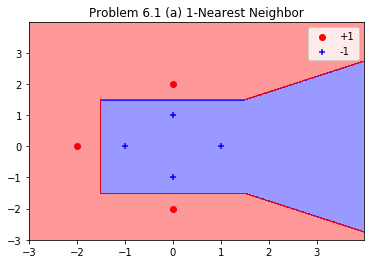

In [3]:
#f, axs = myplot.create_sub_plots(1, 1, 1)
# Fine-tune figure; make subplots farther from each other.    
#f.subplots_adjust(hspace=1, wspace=2)

cls = nn.NearestNeighbors(X_train, y_train, 1)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.1 (a) 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

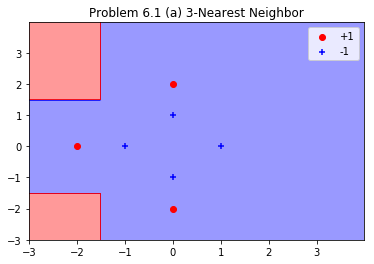

In [4]:
cls = nn.NearestNeighbors(X_train, y_train, 3)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)
myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.1 (a) 3-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

In [5]:
#### Problem 6.1 (b)
def nonlinear_transform_6_1(X):
    #X is Nxd
    Z = np.zeros(X.shape)
    for idx in np.arange(X.shape[0]):
        x1, x2 = X[idx, 0], X[idx, 1]
        z1 = np.sqrt(x1**2 + x2**2)
        z2 = np.arctan(x2/x1)
        Z[idx, 0] = z1
        Z[idx, 1] = z2
    return Z

Z = nonlinear_transform_6_1(df[['x1', 'x2']].values)
df['z1']= Z[:, 0]
df['z2']= Z[:, 1]
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


,x1,x2,y,z1,z2
0,1,0,-1,1.0,0.000000
1,0,1,-1,1.0,1.570796
2,0,-1,-1,1.0,-1.570796
3,-1,0,-1,1.0,-0.000000
4,0,2,1,2.0,1.570796
5,0,-2,1,2.0,-1.570796
6,-2,0,1,2.0,-0.000000


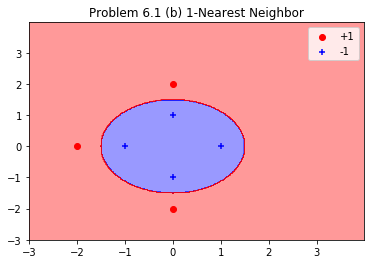

In [7]:
X_train = df[['z1', 'z2']].values
y_train = df['y'].values

cls = nn.NearestNeighbors(X_train, y_train, 1)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls, nonlinear_transform_6_1, alpha = 0.4)
myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.1 (b) 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

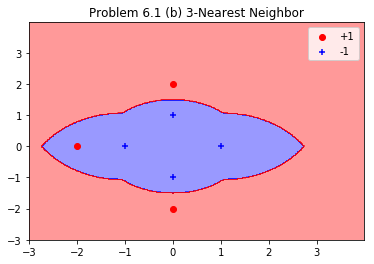

In [8]:
cls = nn.NearestNeighbors(X_train, y_train, 3)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls, nonlinear_transform_6_1, alpha = 0.4)
myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.1 (b) 3-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

#### Problem 6.2

* (a) $\mu_{-1} = (0, 0), \mu_1 = (-\frac{2}{3}, 0)$

From the graph, we see that 3 points are mis-classified. 

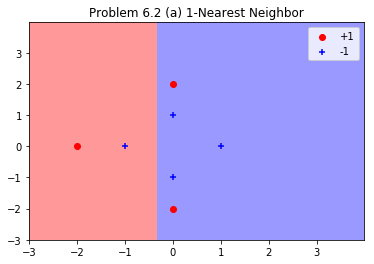

In [14]:
#### Problem 6.2

df_c = pd.DataFrame({'x1':[0, -2/3], 'x2':[0,0], 'y':[-1, 1]})
X_train_c = df_c[['x1', 'x2']].values
y_train_c = df_c['y'].values


cls = nn.NearestNeighbors(X_train_c, y_train_c, 1)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.2 (a) 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

#### Problem 6.2

* (b) We start with merging two closest points of the same class. From the graph below, we see 2 points are misclassified.

Prototype for -1:  [[0. 0.]]
Prototype for +1:  [[-0.5 -0.5]]


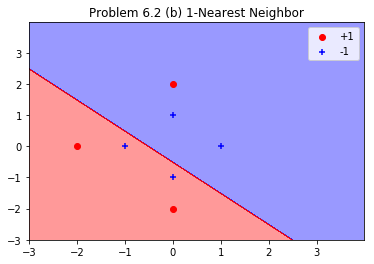

In [7]:
#### Problem 6.2

m1_proto = nn.create_prototypes(df.loc[df['y']==-1][['x1','x2']].values)
p1_proto = nn.create_prototypes(df.loc[df['y']==1][['x1','x2']].values)
print('Prototype for -1: ', m1_proto)
print('Prototype for +1: ', p1_proto)

prototypes = np.vstack([m1_proto, p1_proto])
X_train_p = prototypes
y_train_p = np.array([-1, 1])


cls = nn.NearestNeighbors(X_train_p, y_train_p, 1)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.2 (b) 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

#### Problem 6.3

For positive semi-definite matrix, we can decompose it into $Q=P^T\Lambda P$, where $P$ is orthogonal and $\Lambda$ is diagonal matrix with positive or zero elements (since it's p.s.d.).

So $d(x,x') = (x-x')^TQ(x-x') = (x-x')^TP^T\Lambda P(x-x') = \left(\Lambda^{\frac{1}{2}}P(x-x')\right)^T\left(\Lambda^{\frac{1}{2}}P(x-x')\right) = (z-z')^T(z-z') = \|z-z'\|^2$

So this is equivalent to the $k$-nearest neighbor rule with the standard Euclidean distance with feature transformation of $z=\Lambda^{\frac{1}{2}}Px$

#### Problem 6.4

In [16]:
#### Problem 6.4
N = 2000
max_v = 10000
rad, thk = 10, 5
sep = 5
eta = 1
use_adaline=False
maxit = 1000
dim = 2

radiuses, radians = data.generate_random_ring(N, rad, rad+thk, max_v)
xs, ys, signs = data.move_bottom_ring_and_assign(radiuses, radians, rad + thk/2.0, -sep)
df = pd.DataFrame({'x1':xs.flatten(), 'x2':ys.flatten(), 'y':signs.flatten()})
df['x0'] = 1
df = df[['x0','x1','x2','y']]
positives = df.loc[df['y']==1]
negatives = df.loc[df['y']==-1]

X_train = df[['x1', 'x2']].values
y_train = df['y'].values

xsp1 = positives[['x1']].values
xsm1 = negatives[['x1']].values
ysp1 = positives[['x2']].values
ysm1 = negatives[['x2']].values

Number of positive points:  1037
Number of negatives points:  963


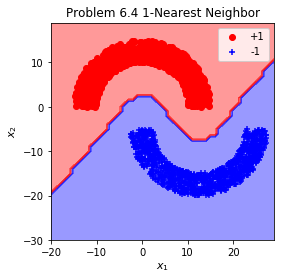

In [18]:
figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

#ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
#ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')
print('Number of positive points: ', len(positives))
print('Number of negatives points: ', len(negatives))

cls = nn.NearestNeighbors(X_train, y_train, 1)
x1_min, x1_max = -20, 30
x2_min, x2_max = -30, 20
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=1)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.4 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
#ax.set_title('Data set size = %s'%N, fontsize=9)
ax.axis('tight')
plt.show()

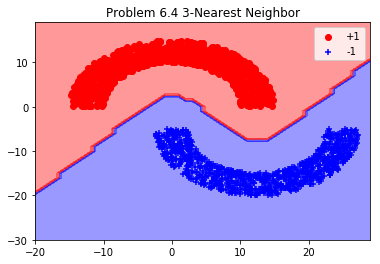

In [19]:
cls = nn.NearestNeighbors(X_train, y_train, 3)
x1_min, x1_max = -20, 30
x2_min, x2_max = -30, 20
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=1)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.4 3-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
#ax.set_title('Data set size = %s'%N, fontsize=9)
ax.axis('tight')
plt.show()

#### Problem 6.5 TODO

Let the Voronoi diagram be generated from a set of data: $x_1, x_2, \dots, x_N$. 

Suppose we have a Voronoi region $C$, which is 'owned' by $x_1$, so for any point $x$ within region $C$, we have $d(x, x_1) \le d(x, x_2) \le \dots \le d(x, x_N)$. 

Now consider two points $x_a, x_b\in C$, and for any $\lambda \in [0, 1]$ We have

$d(\lambda x_a + (1-\lambda)x_b, x_1) = \|\lambda x_a + (1-\lambda)x_b - x_1\| = \| \lambda(x_a - x_1) + (1-\lambda)(x_b-x_1)\| \le \|\lambda(x_a - x_1)\| + \|(1-\lambda)(x_b-x_1)\| \le \lambda \|x_a - x_1\| + (1-\lambda)\|x_b-x_1\| \le \lambda d(x_a, x_2) + (1-\lambda)d(x_b, x_2)$

#### Problem 6.6

$w_{reg} = (X^TX + \lambda \Gamma^T\Gamma)^{-1}X^Ty$, so we have

$g(x) = x^Tw_{reg} = x^T(X^TX + \lambda \Gamma^T\Gamma)^{-1}X^Ty$

The $X$ is $N\times d$ matrix, with $N$ data points in $R^d$, and $y$ is $N\times 1$ vector. 
So each column of $X^T$ is just $x_n$, the $n$th data point. 

Consider the matrix $B=X^Ty = \begin{bmatrix}x_1 & \dots & x_n & \dots & x_N \end{bmatrix} \begin{bmatrix}y_1 \\ \dots \\ y_n \\ \dots \\ y_N \end{bmatrix} = x_1y_1 + \dots + x_n y_n + \dots + x_Ny_N = \sum^N_{n=1}x_ny_n$ where the sum comes from the column multiply row in matrix multiplication. 

So we have $g(x) = w^Tw_{reg} = \sum^N_{n=1} x^T(X^TX + \lambda \Gamma^T\Gamma)^{-1}x_ny_n$

Let $K(x, x_n) = x^T(X^TX + \lambda \Gamma^T\Gamma)^{-1}x_n = x^TQx_n$, then $g(x) = \sum^N_{n=1} K(x, x_n)y_n$. Since $Q$ is positive definite, The kernel here is a general inner product (So called Q-inner product) between $x, x_n$.

This looks similar to RBF except that the weights of $y_n$ are not normalized.

#### Problem 6.7

The hypothesis set $\mathcal{H}$ contains all labeled Voronoi tessellations on $K$ points. That means for any $K$ points, the hypothesis set will have $K$ regions and it contains all possible label combinations for these $K$ points. Since each region can have $+1$ or $-1$, so there are total $2^K$ hypotheses in $\mathcal{H}$. It's clear that the hypothesis set can reproduce any dichotomy of any $K$ given points. 

If we however, have one extra point, since the first $K$ points decide the signs of each Voronoi region, the new point will have to share a common region with another point. This limits the possible label combinations that can be produced. For example, if all points are positive, then all $K$ regions are with positive sign, the last point will have no choice, but falls into a positive region. 

It's clear, that we won't be able to produce the full $2^{K+1}$ labels from $K+1$ points. So we conclude $d_{VC}(\mathcal{H}) = K$.

#### Problem 6.8

When the target value is deterministic, i.e. $\pi(x) = 0$ or $\pi(x) = 1$, which means that in the x-domain, if we pick $x$ in certain area, we'll have $y=1$, if we pick $x$ from other areas, we'll have $y=-1$. If we set the target function to 1 when $\pi(x) = 1$ and to 0 when $\pi(x) = 0$, then we have optimal error $E^*_{out} = 0$ since no probability is involved once $x$ is given. 

Suppose we have the selected hypothesis from 1-nearest neighbor, $g_N(x) = \text{sign}(x_{[1]}) = y_{[1]}$. Then the error on a test point $x$ is thus (assuming fixed $x$ for now):

$e(g_N(x)) = P(g_N(x)\ne y(x)) = P(y_{[1]} \ne y(x)) = \pi(x)(1-\pi(x_{[1]})) + \pi(x_{[1]})(1-\pi(x)) = 2\pi(x)(1-\pi(x))+(2\pi(x)-1)(\pi(x)-\pi(x_{[1]})) = 2\pi(x)(1-\pi(x)) + \epsilon_N(x)$

Since $\pi(x) = 0\;or\; 1$, so we have $e(g_N(x)) = \epsilon_N(x)$

Take expectation on $g_N$, we have $E_{out}(g_N) = E[P(g_N(x)\ne y)] = E_x[\epsilon_N(x)]$

As $N\to \infty$, every point $x$ has a nearest neighbor that is close by. That is, $x_{[1]}(x) \to x$ for all $x$, so we have $\pi(x_{[1]}) = \pi(x)$ because $\pi(x)$ is deterministic and the probability for $x$ to fall on boundary is 0. Then $\epsilon_N(x) = 0$, so $E_{out}(g_N(x)) = 0 = E^*_{out}$

#### Problem 6.9 TODO

#### Problem 6.10

From theorem 6.1, we see that $E_{out}(1) \le 2E^*_{out}$, also for any $k$, we have $E^*_{out} \le E_{out}(k)$ since $E^*_{out}$ is the theoretical optimal minimum that can be achieved by the target function and all $E_{out}(k)$ are approximations to the target function.

With exercise 6.3 (d), it shows that $E_{out}(g_N)$ is asymptotically $E^*_{out}(1+O(k^{-\frac{1}{2}}))$, as $k$ increases, this asymptotical value decrease, so we have $E_{out}(k) \le E_{out}(k-1)$. 

Thus the inequality holds.


#### Problem 6.11

* (a) For a given test point $x$, suppose its nearest neighbor among original $N$ data points is $x_i$, if $x_i$ is not one of the marked positions, i.e. $x_i$ has not been removed in condensed data, then the classification stays the same as original data. If $x_i$ is condensed out, then the nearest neighbor of $x$ in the condensed data is one of the neighbors of $x_i$, whatever the neighbor is, it has the same classification as $x_i$, so $x$ is still classified the same as $x_i$. 

This shows that the condensed data is consistent with the full data for the 1-NN rule

* (b) TODO

#### Problem 6.12

* (a) If we start with the training set, at first, we have the largest influence set as $S_{n^*}$, since by definition, every point in $S_{n^*}$ is closer to $x_{n^*}$ than to any point of a different class. These points in $S_{n^*}$ will have class of  $x_{n^*}$ in the condensed set if  $x_{n^*}$ stays in the condensed set. This is always true because after we remove all the points in $S_{n^*}$ from training set, we update the remaining influence sets by deleting $x_{n^*}$ and $S_{n^*}$. So no influence set contains $x_{n^*}$ after first step. Since we only remove points in influence sets from training set, we see that  $x_{n^*}$ stays in the condensed set.

    We now repeat the step 1, where we have another influence set $S_{n^2}$ with the largest size in the remaining influence sets, we immediate see that all the points in this seoncd largest influence set $S_{n^2}$ will have class of $x_{n^2}$ in the condensed set, since $x_{n^2}$ stays in the condensed set. 

    Continue doing this until we have all influence sets are empty. We can easily deduce that every point we remove will have the class with the corresponding $x$, which are all left in the condensed set.

    It's also easy to see, that every point stays in the final condensed set always has the same class as in training set, since their nearest neighbors are themselves.

    So the final condensed set is training set consistent. 

* (b) I think the condensed set created through influence set can be smaller than the CNN algorithm. Since the latter starts randomly with 1 point, and needs to add point in until the condensed set is training set consistent, it can have as large as the full training set in the final condensed set. While the influence set method creates the condensed set by comparing distances among all points. It uses all the distance information at the very beginning, unlike the CNN, which increases its understanding step by step (with some randomness). I feel like the CNN one should be at least as large as the influence set method.

* (c) Since we need to use the pairwise distances among points to construct the influence sets. We can pre-compute the pairwise distances for all pairs of points. That it, suppose there are $N$ data points in the training set, we pre-compute a matrix $D$ of $N\times N$, where $D_{ij}=\|x_i-x_j\|$. 
This matrix is symmetric with zeros on the diagonal. So we spend $\frac{N^2-N}{2}$, i.e. $O(N^2)$, operations to compute the distances. 

    Also, for each point $x_n$, we can find the minimum distance from $x_n$ to other points of different class. This costs us $N$ minimization operations, since each minimization takes $O(N)$, so the total cost here is $O(N^2)$. Call the minimal distance from $x_n$ to points of different class as $d_m(x_n)$.
    
    Additionally, we construct two sets, $S^+, S^-$ that contains positive and negative points respectively.
    Now we can implement the algorithm:
  1. Initialize the condensed set $C$ as the original training set $\mathcal{D}$.
  2. for each point $x_i$ in the training set: $O(N^2)$
    * for each point $x_j$ of the same class other than $x_i$
      * If $d(x_i,x_j) < d_m(x_j)$, then put $x_j$ into $S_i$
  3. If the set of $S$ is not empty, find the set $S_{n^*}$ with the largest size: $O(N)$
    * Remove elements of $S_i$ from $C$: $O(N)$
    * Remove $S_i$ from the array of $S$
    * Remove elements of $S_i$ and $x_i$ from other sets $S$: $O(N)$
    * Repeat step 3
  4. If all the sets of $S$ are empty, stop.
   
    The final condensed set $C$ is what we are looking for.
    
    So the total cost is $O(N^2) + O(N^2) + O(N^2) + O(N^2) = O(N^2)$, on quadratic order.


#### Problem 6.13

In [1]:
#### Problem 6.13 (a) 


def generate_data_613(N, do_plot=True, var = 0.15):
    center = np.array([0,0]) #The center of the circle
    N_gs = 4  #Number of Gaussians
    radius = 1 #Radius of circle

    # The centers(means) of Gaussians are equally spaced on the circle
    means = data.generate_equal_spaced_points_on_circle(center, radius, N_gs)

    # Covariance for each Gaussian
    #var = 0.15
    cov1 = np.array([[var,0], [0, var]])
    covs = np.array([cov1]*N_gs)

    # The weights of each Gaussian bump
    probs = np.ones(N_gs)/4

    # Total number of data points
    #N = 1000

    # Random numbers generated by Gaussian Mixture Model (GMM)
    gmm_rand_nums = data.generate_gmm(means, covs, probs, N)

    pos = np.vstack([gmm_rand_nums[0], gmm_rand_nums[2]]) # y= 1
    neg = np.vstack([gmm_rand_nums[1], gmm_rand_nums[3]]) # y= -1
    xsp, ysp = pos[:,0], pos[:,1]
    xsn, ysn = neg[:,0], neg[:,1]
    if do_plot:
        xs = [xsp, xsn]
        ys = [ysp, ysn]        
        myplot.plt_plot(xs, ys, 'scatter', ['b', 'r'], ['o', 'x'], ['y=+1', 'y=-1'], 
                    title = 'Gaussian Mixture Model Data', yscale = None, ylb = None, yub = None,
                    xlb = None, xub = None, xlabel = 'x1-coordinate', ylabel = 'x2-coordinate',
                    legends = ['+', '-'], legendx = None, legendy = None)

    df_p = pd.DataFrame({'x1':xsp, 'x2':ysp, 'y':1})
    df_n = pd.DataFrame({'x1':xsn, 'x2':ysn, 'y':-1})
    df = pd.concat([df_p, df_n])
    df['id'] = np.arange(len(df))
    df.sort_values(by=['id'], inplace=True)
    df.set_index('id', inplace=True)

    return df

def is_training_consistent(condensed_set, df):
    # Testing
    X = df[['x1', 'x2']].values
    y= df['y'].values    
    Xs = X[condensed_set, :]
    ys = y[condensed_set]
    nn1 = nn.NearestNeighbors(Xs, ys, 1)
    predicted = nn1.predict(X)
    df['cnn_predicted'] = predicted
    df['diff'] = np.abs(df['y'] - df['cnn_predicted'])
    dfd = df.loc[df['diff']>0]
    if len(dfd) > 0:
        print('ERROR: Found inconsistency in training set!')
        print(dfd)
    else:
        print('Found a training set consistent CNN!')
        print('Size of CNN: ', len(condensed_set))
    return df
    
def cnn(df, do_plot=True):
    cnn = nn.CNN(1)
    X = df[['x1', 'x2']].values
    y= df['y'].values
    S_idx, S, Sy = cnn.find_cnn(X, y)
    
    df = is_training_consistent(S_idx, df)

    if do_plot:
        Xs = X[S_idx, :]
        ys = y[S_idx]
        
        x1s = [Xs[ys==1, 0], Xs[ys==-1, 0]] #[xsp, xsn, Xs[:, 0]]
        x2s = [Xs[ys==1, 1], Xs[ys==-1, 1]] #[ysp, ysn, Xs[:, 1]]
        myplot.plt_plot(x1s, x2s, 'scatter', ['b', 'r'], ['o', 'x'], ['y=+1', 'y=-1'], 
                title = 'Gaussian Mixture Model Condensed by CNN', yscale = None, ylb = None, yub = None,
                xlb = None, xub = None, xlabel = 'x1-coordinate', ylabel = 'x2-coordinate',
                legends = ['+', '-'], legendx = None, legendy = None)      
    return S_idx

def influence_cnn(df, do_plot=True):
    inf_nn = nn.InfluenceCNN()
    X = df[['x1', 'x2']].values
    y= df['y'].values    
    C_idx, C, Cy = inf_nn.find_cnn(X, y)
    df = is_training_consistent(C_idx, df)
    if do_plot:
        Xs = X[C_idx, :]
        ys = y[C_idx]
        
        x1s = [Xs[ys==1, 0], Xs[ys==-1, 0]]
        x2s = [Xs[ys==1, 1], Xs[ys==-1, 1]]
        myplot.plt_plot(x1s, x2s, 'scatter', ['b', 'r'], ['o', 'x'], ['y=+1', 'y=-1'], 
                    title = 'Gaussian Mixture Model Condensed by Influence Sets', yscale = None, ylb = None, yub = None,
                    xlb = None, xub = None, xlabel = 'x1-coordinate', ylabel = 'x2-coordinate',
                    legends = ['+', '-'], legendx = None, legendy = None)        
    return C_idx

#### The CNN Algorithm

Final S_idx:  [779   0 172 237 267 268 511  18 277 512 164 513 289 292 514 270 327 328
 347 387 516   3  20 129 473 517 520 324 521 524 528 530 290 310 531 493
 556 560 562 567 194 569 287 309 311 570 107 118 571 361 575 582 329 597
 604 605 326 487 501 609 629 649 650   7  28  76 199 220 652 656 663  71
 149 190 667  34 148 189 672 690 704 130 262 718 373 449 490 724 339 345
 375 477 508 733 738   9 140 200 276 741 744 466 745   6 747 428 759 272
 427 764 770 773 774 775 776  40 261 777  31  51 778 780 782   5  22  24
 178 786 793 263 796  68 799 340 380 395 818 824 834 836 837 266 307 308
 392 838 376 855 271 874  99 249 890 895  50 125 901 919 300 921 923 925
 931 470 932 937 943 355 379 947 275 291 337 341 953 964 128 188 244 976
 997 458]
Found a training set consistent CNN!
Size of CNN:  182


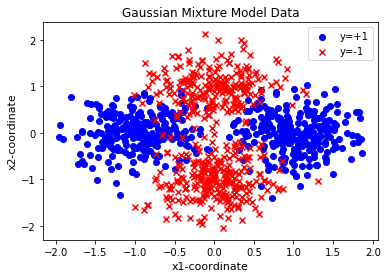

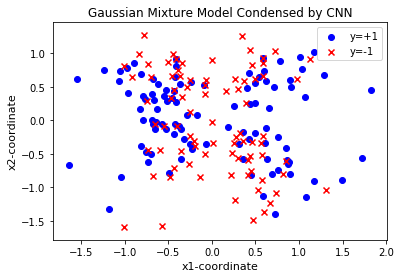

In [5]:
#### Problem 6.13 (a) CNN Algorithm
N=1000
df = generate_data_613(N, do_plot=True)
plt.figure()
C_idx = cnn(df, do_plot=True)

#### Problem 6.13 Influence Algorithm to condense data

Found a training set consistent CNN!
Size of CNN:  162


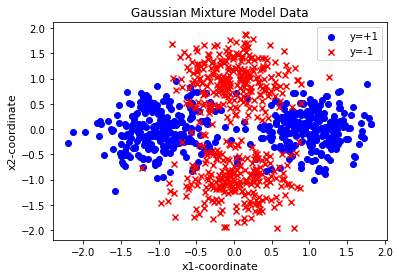

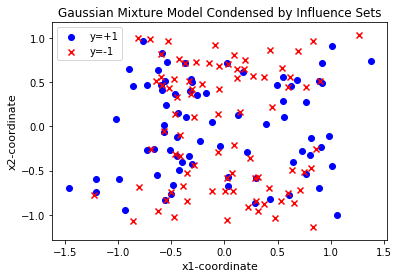

In [8]:
#### Problem 6.13 (a) Influence set CNN Algorithm
N=1000
df = generate_data_613(N, do_plot=True)
plt.figure()
S_idx = influence_cnn(df, do_plot=True)

#### Problem 6.13 (c) Compare CNN and Influence Set Condensed NN

In [29]:
N=1000
tot_C, tot_S = 0, 0
for t in np.arange(1000): #1000 experiments
    if t %100 == 1:
        print('Working on : ', t)
    df = generate_data_613(N, do_plot=False)
    C_idx = cnn(df, do_plot=False)
    S_idx = influence_cnn(df, do_plot=False)
    tot_C += len(C_idx)
    tot_S += len(S_idx)
    
print('Average number of condensed set in CNN: ', tot_C/N)    
print('Average number of condensed set in Influence set generated CNN: ', tot_S/N)    

Working on :  1
Working on :  101
Working on :  201
Working on :  301
Working on :  401
Working on :  501
Working on :  601
Working on :  701
Working on :  801
Working on :  901
Average number of condensed set in CNN:  190.668
Average number of condensed set in Influence set generated CNN:  164.67


#### Problem 6.14

#### Problem 6.14 (a) Prepare Zip Code Data

In [2]:
def split_zip_data(zip_data_path, splits = 1, train_size = 500):
    # Split the raw data into train and test
    # splits: specify the number of random splits for each train-test pair
    X_tr, y_tr, X_te, y_te = data.load_zip_data(zip_data_path)
    train_size = train_size
    splits = splits
    data_splits = data.sample_zip_data(X_tr, y_tr, train_size, splits)
    return data_splits

def set_two_classes(y_train, y_test, digit):    
    # Classify digit '1' vs. not '1'
    y_train[y_train==digit] = 1
    y_test[y_test==digit] = 1
    
    y_train[y_train!=digit] = -1
    y_test[y_test!=digit] = -1
    return y_train, y_test

In [3]:
zip_data_path = './data/usps.h5'
data_splits = split_zip_data(zip_data_path, splits = 1)

X_train, y_train, X_test, y_test = data_splits[0]

print('X_train: ', X_train.shape, 'y_train: ',y_train.shape, 'X_test: ',X_test.shape, 'y_test: ', y_test.shape)
unique, counts = np.unique(y_train, return_counts=True)
freqs = counts/len(y_train)
print('Frequencies of the digits: \n', dict(zip(unique, freqs)))

y_train, y_test = set_two_classes(y_train, y_test, 1)

X_train:  (500, 256) y_train:  (500,) X_test:  (6791, 256) y_test:  (6791,)
Frequencies of the digits: 
 {0: 0.164, 1: 0.138, 2: 0.1, 3: 0.09, 4: 0.09, 5: 0.076, 6: 0.092, 7: 0.088, 8: 0.074, 9: 0.088}


#### Problem 6.14 (b) Performance of 3-NN

In [13]:
print('------ Prediction with the raw pixels -----')
k=1
cls = nn.NearestNeighbors(X_train, y_train, k)
y_pred_1 = cls.predict(X_train)
diff_1 = np.abs(y_train - y_pred_1)
diff_1[diff_1 !=0] = 1
E_in_1 = np.sum(diff_1!=0)/len(y_train)
print('1-NN E_{in}: ', E_in_1)

# N.B. This prediction is from the raw pixels
k=3 
cls = nn.NearestNeighbors(X_train, y_train, k)
y_pred_3 = cls.predict(X_train)
diff_3 = np.abs(y_train - y_pred_3)
diff_3[diff_3 !=0] = 1
E_in_3 = np.sum(diff_3!=0)/len(y_train)
print('3-NN E_{in}: ', E_in_3)

y_pred_te_3 = cls.predict(X_test)
diff_te_3 = np.abs(y_test - y_pred_te_3)
diff_te_3[diff_te_3 !=0] = 1
E_out_3 = np.sum(diff_te_3!=0)/len(y_test)
print('3-NN E_{out}: ', E_out_3)

------ Prediction with the raw pixels -----
1-NN E_{in}:  0.0
3-NN E_{in}:  0.01
3-NN E_{out}:  0.010455013989103226


#### Problem 6.14 (c) Test on Image Flip

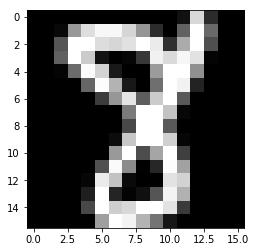

In [61]:
id = 5
X1 = X_train[id]
X1 = X1.reshape(16, 16)
plt.imshow(X1, cmap='gray')

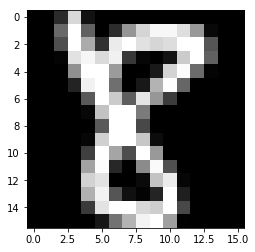

In [62]:
Xf = np.flip(X1, axis=1)
plt.imshow(Xf, cmap='gray')

#### Problem 6.14 (c) Condense the zip code data with CNN

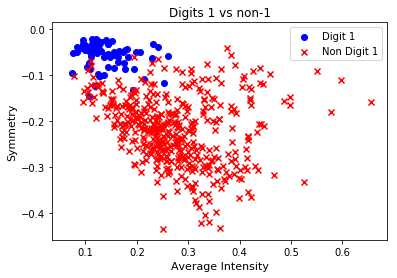

In [5]:
X_tr, X_te = data.compute_features(X_train, X_test)
x1s = [X_tr[y_train==1, 0], X_tr[y_train==-1, 0]]
x2s = [X_tr[y_train==1, 1], X_tr[y_train==-1, 1]]
myplot.plt_plot(x1s, x2s, 'scatter', ['b', 'r'], ['o', 'x'], ['Digit 1', 'Non Digit 1'], 
        title = 'Digits 1 vs non-1', yscale = None, ylb = None, yub = None,
        xlb = None, xub = None, xlabel = 'Average Intensity', ylabel = 'Symmetry',
        legends = ['+', '-'], legendx = None, legendy = None)      


In [14]:
#%%time
k = 3
cnn = nn.CNN(k)
S_idx, S, Sy = cnn.find_cnn(X_tr, y_train)

X_cnn, y_cnn = X_tr[S_idx, :], y_train[S_idx]
cnn_cls = nn.NearestNeighbors(X_cnn, y_cnn, k) # 3-NN with condensed data
cls = nn.NearestNeighbors(X_tr, y_train, k) # 3-NN with original data

print('---- Prediction with Condensed Data: In-Sample Error')
y_pred_cnn_3 = cnn_cls.predict(X_cnn)
diff_cnn_3 = y_cnn - y_pred_cnn_3
diff_cnn_3[diff_cnn_3 !=0] = 1
E_in_cnn_3 = np.sum(diff_cnn_3!=0)/len(y_cnn)
print('3-NN with CNN E_{in}: ', E_in_cnn_3)


print('------ Check if CNN is traing set consistent ------')
y_pred_orig_train_cnn_3 = cnn_cls.predict(X_tr)
y_pred_orig_train_nn_3 = cls.predict(X_tr)
diff_orig_train_cnn_3 = y_pred_orig_train_nn_3 - y_pred_orig_train_cnn_3
diff_orig_train_cnn_3[diff_orig_train_cnn_3 !=0] = 1
E_in_orig_train_cnn_3 = np.sum(diff_orig_train_cnn_3!=0)/len(y_train)
print('Differences between 3NN using original data and condensed data: ', E_in_orig_train_cnn_3)

print('------ Test error of CNN with condensed data ------') 
y_pred_cnn_te_3 = cnn_cls.predict(X_te)
diff_cnn_te_3 = y_test - y_pred_cnn_te_3
diff_cnn_te_3[diff_cnn_te_3 !=0] = 1
E_out_cnn_3 = np.sum(diff_cnn_te_3!=0)/len(y_test)
print('3-NN with CNN on test data E_{out}: ', E_out_cnn_3)

---- Prediction with Condensed Data: In-Sample Error
3-NN with CNN E_{in}:  0.06666666666666667
------ Check if CNN is traing set consistent ------
Differences between 3NN using original data and condensed data:  0.0
------ Test error of CNN with condensed data ------
3-NN with CNN on test data E_{out}:  0.036371668384626715


#### Problem 6.14 (d)

The results show that the average $E_{in}$ are the same for original and condensed data since the CNN is training set consistent, but the average $E_{out}$ is larger when using condensed data.

In [15]:
def get_cnn_cls(X, y, k):
    cnn = nn.CNN(k)
    S_idx, S, Sy = cnn.find_cnn(X, y)
    X_cnn, y_cnn = X[S_idx, :], y[S_idx]
    cnn_cls = nn.NearestNeighbors(X_cnn, y_cnn, k) # k-NN with condensed data
    return cnn_cls
    
def calc_with_nn(cls, X, y, X_test, y_test):
    y_pred_in = cls.predict(X)
    diff_in = np.abs(y - y_pred_in)
    diff_in[diff_in!=0] = 1
    E_in = np.sum(diff_in!=0)/len(y)

    y_pred_out = cls.predict(X_test)
    diff_out = np.abs(y_test - y_pred_out)
    diff_out[diff_out!=0] = 1
    E_out = np.sum(diff_out!=0)/len(y_test)
    return E_in, E_out
        

k=3
tot_exps = 1000    
zip_data_path = './data/usps.h5'
data_splits = split_zip_data(zip_data_path, splits = tot_exps)
digit = 1 #we classify digit '1' vs. non '1'
nn_Eins, nn_Eouts = [], []
cnn_Eins, cnn_Eouts = [], []
for it in range(tot_exps):
    if (it + 100) % 100 == 0:
        print('---- Working on iteration: ', it)
    X_train, y_train, X_test, y_test = data_splits[it]
    y_train, y_test = set_two_classes(y_train, y_test, digit)
    X_tr, X_te = data.compute_features(X_train, X_test)
    
    nn_cls = nn.NearestNeighbors(X_tr, y_train, k)
    cnn_cls = get_cnn_cls(X_tr, y_train, k)
    
    nn_E_in, nn_E_out = calc_with_nn(nn_cls, X_tr, y_train, X_te, y_test)
    cnn_E_in, cnn_E_out = calc_with_nn(cnn_cls, X_tr, y_train, X_te, y_test)
    
    nn_Eins.append(nn_E_in)
    nn_Eouts.append(nn_E_out)
    cnn_Eins.append(cnn_E_in)
    cnn_Eouts.append(cnn_E_out)

nn_mean_Eins = np.mean(np.array(nn_Eins))    
nn_mean_Eouts = np.mean(np.array(nn_Eouts))    

cnn_mean_Eins = np.mean(np.array(cnn_Eins))    
cnn_mean_Eouts = np.mean(np.array(cnn_Eouts))    

print("3-NN with original data mean E_in and E_out: ", nn_mean_Eins, nn_mean_Eouts)
print("3-NN with condensed data mean E_in and E_out: ", cnn_mean_Eins, cnn_mean_Eouts)

---- Working on iteration:  0
3-NN with original data mean E_in and E_out:  0.021820000000000003 0.03381976144897659
3-NN with condensed data mean E_in and E_out:  0.021820000000000003 0.035780444706228834


#### Problem 6.15 TODO

Let $N=2^k$, For a data set of size $N$, let $T(N)$ be the expected time to find the nearest neighbor in a cluster with $N$ points. At the beginning, it'll take $2d$ operations to compute the distances from $x$ to $\mu_1, \mu_2$, which are the means of its sub-clusters. It then need use $T(\frac{N}{2})$ time to find the nearest neighbor in one of the sub-clusters. Once it finds the nearest neighbor from one of its sub-clusters, it needs to apply the bound condition, if it satisfies the bound condition (with probability $p$), then it's done. Otherwise, with probability $1-p$, it needs to find the nearest neighbor of another sub-cluster, which takes expectation of operations $(1-p)T(\frac{N}{2})$. After this, the algorithm then compares the two nearest neighbors to get the nearest neighbor for the original cluster.

So the total cost for any $N\le 2^k$ will be $T(N) \le 2d + T(\frac{N}{2}) + (1-p)T(\frac{N}{2}) = 2d + (2-p)T(\frac{N}{2})$. 

We apply this recursively, i.e. for $N=2^k$, take $T(\frac{N}{2}) = 2d + (2-p)T(\frac{N}{2^2})$ into abvoe equation, and notice that $T(\frac{N}{2^k}) = O(1)$, we have 

$T(N) = 2d \frac{1-(2-p)^k}{p-1} + (2-p)^k T(1) = O(d(2-p)^k) = O(dN^{\log_2(2-p)})$

I am not sure where does the term $O(d\log N)$ come from. It appears that if $p=1$, for $N=2^k$, we have $T(N) = O(d\log N)$ from the recursive relationship. The term $O(dN^{\log_2(2-p)})=O(d)$

#### Problem 6.16

#### Problem 6.16 (a)-(i) Construct 10-partition

In [2]:
def partition_data(pts, M, do_plot=True):
    centers, radii, clusters = nn.create_data_partitions(pts, M, 100)
    if do_plot:
        x1s = [pts[:, 0], centers[:, 0]]
        x2s = [pts[:, 1], centers[:, 1]]
        myplot.plt_plot(x1s, x2s, 'scatter', ['b', 'r'], ['o', 'x'], ['Raw Data', 'Centers'], 
            title = '6.16(a) Random Uniformly Points', yscale = None, ylb = None, yub = None,
            xlb = None, xub = None, xlabel = 'x1-coordinate', ylabel = 'x2-coordinate',
            legends = ['+', '-'], legendx = None, legendy = None, marker_sizes=[4, 100])          
    return centers, radii, clusters

def brute_force(pts, query_pts):
    # Brute Force Approach
    start_time = time.time()
    neighbors = []
    for pt in query_pts:
        p, _ = nn.find_nn_idx(pt.reshape(-1, 2), pts, 1)
        neighbors.append(p)
    end_time = time.time()    
    brute_time = (end_time - start_time) #seconds
    print(f'It took {brute_time} seconds for brute force approach')
    return neighbors

def simple_branch_bound_approach(pts, query_pts, clusters, centers, radii):
    # Simple Branch and Bound Approach
    
    start_time = time.time()
    neighbors2 = []
    c1 = 0
    c2 = 0
    num_centers = len(centers)
    for pt in query_pts:
        #print(pt)
        p, count1, count2 = nn.simple_brach_bound(pt, pts, clusters, centers, radii)
        c1 += count1
        c2 += count2
        neighbors2.append(p)
    end_time = time.time()    
    bb_time = (end_time - start_time) #seconds
    print(f'It took {bb_time} seconds for Simple Branch and Bound Approach')
    print(f'There are total {c1} type 1 calculations out of {N} queries with {num_centers} clusters')
    print(f'There are total {c2} type 2 calculations out of {N} queries with {num_centers} clusters')
    return neighbors2

def check_consistencey(pts, neighbors, neighbors2):
    # Check if two approaches match with each other
    diffs = {}
    for idx, nn1_idx in enumerate(neighbors):
        nn1 = pts[nn1_idx]
        nn2 = neighbors2[idx]
        diff = np.linalg.norm(nn1.flatten() - nn2.flatten())
        if diff > 1.0e-16:
            diffs[idx] = diff
    
    print(f'There should be no difference between the two approaches: {len(diffs)}')
    return diffs
    

Found converge in partition at iteration: 33
It took 50.793227434158325 seconds to cluster the points.
[[0.3613153  0.64641316]
 [0.8260089  0.17263588]
 [0.15549683 0.15726887]
 [0.47384104 0.14740308]
 [0.85307687 0.84131751]
 [0.84530446 0.51661743]
 [0.16288072 0.8491088 ]
 [0.55669929 0.43934924]
 [0.1525688  0.463787  ]
 [0.54394678 0.8457164 ]]
{0: 0.1923223628150238, 1: 0.23992485852258555, 2: 0.21783759591090682, 3: 0.23793841031392618, 4: 0.21452558040369374, 5: 0.22444966511316403, 6: 0.23465706155088392, 7: 0.22533788232769586, 8: 0.24141339035826914, 9: 0.23819910989547682}


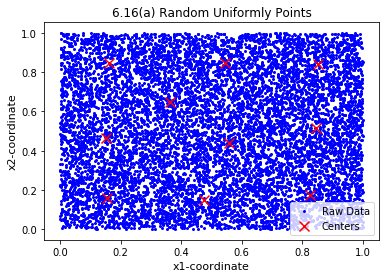

In [3]:
N = 10000
dim = 2
M = 10
pts = data.generate_random_numbers01(N, dim, max_v = 100000)
query_pts = data.generate_random_numbers01(N, dim, max_v = 100000)
start_time = time.time()
centers1, radii1, clusters1 = partition_data(pts, M, do_plot=True)
end_time = time.time()    
bb_time = (end_time - start_time) #seconds
print(f'It took {bb_time} seconds to cluster the points.')
print(centers1)
print(radii1)

#### Problem 6.16 (a)-(ii) Find Nearest Neighbors using Two Algos with Uniformly Generated Data

It takes less time with branch and bound approach. From the graph of the data, we can see that the data is partitioned relately well, not many clusters overlap with each other. 

In [4]:
neighbors = brute_force(pts, query_pts)
neighbors2 = simple_branch_bound_approach(pts, query_pts, clusters1, centers1, radii1)
diffs = check_consistencey(pts, neighbors, neighbors2)
print(diffs)
assert(len(diffs)==0)

It took 6.384962558746338 seconds for brute force approach
It took 4.237643718719482 seconds for Simple Branch and Bound Approach
There are total 0 type 1 calculations out of 10000 queries with 10 clusters
There are total 16412 type 2 calculations out of 10000 queries with 10 clusters
There should be no difference between the two approaches: 0
{}


#### Problem 6.16 (b) Use Gaussian Mixture Data

It takes similar amount of time with branch and bound mehtod. That's because the centers of the gaussian distributions are not well separated and also because the variance used to generate the data is big, so there are many overlaps in the 10 clusters. 
Although there are less computations, the algo is more complicate than the brute force method and ends up with similar amount of total time. For $variance=0.1**2$, the performance is actually worse compared with data generated uniformly. 

Note, the query data is also generated with gaussiam mixture model.

If we increase variance, the method will take more time than the simple method. 

Randomly generated Gaussian centers: 
 [[0.38929389 0.46622466]
 [0.38356384 0.97705977]
 [0.43419434 0.99437994]
 [0.11821118 0.68403684]
 [0.61105611 0.20324203]
 [0.08075081 0.68720687]
 [0.62922629 0.59732597]
 [0.1196612  0.11414114]
 [0.96684967 0.70928709]
 [0.31688317 0.32335323]]
It took 143.2013282775879 seconds to cluster the points.
[[0.45214728 0.4387529 ]
 [0.25090107 0.56168152]
 [0.28489489 0.2894621 ]
 [0.6394493  0.61581557]
 [0.03943495 0.67315614]
 [0.21207227 0.82647071]
 [0.61316346 0.18659258]
 [0.4315139  1.00624219]
 [0.1065868  0.09720159]
 [0.97129783 0.7091708 ]]
{0: 0.20618776813431627, 1: 0.22455609123501086, 2: 0.27071934473144904, 3: 0.3033206381304739, 4: 0.3589391189761204, 5: 0.3014186642114046, 6: 0.36835120612665456, 7: 0.3348867199597102, 8: 0.31231424598824553, 9: 0.3362028875768226}


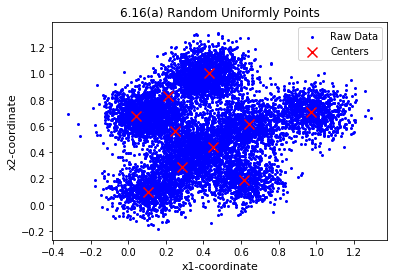

In [13]:
G = 10
# The centers(means) of Gaussians are randomly points in [0,1]^2
means = data.generate_random_numbers01(G, dim, max_v = 100000)
print(f'Randomly generated Gaussian centers: \n {means}')

# Covariance for each Gaussian
var = 0.1**2
cov1 = np.array([[var,0], [0, var]])
covs = np.array([cov1]*G)

# The weights of each Gaussian bump
probs = np.ones(G)/G

# Random numbers generated by Gaussian Mixture Model (GMM)
gmm_random_nums = data.generate_gmm(means, covs, probs, N)
g_pts = np.empty((0,2))
for ix, ids in gmm_random_nums.items():
    g_pts = np.vstack([g_pts, ids])
    
N = 10000
dim = 2
M = 10
#query_pts = data.generate_random_numbers01(N, dim, max_v = 100000)
q_pts = data.generate_gmm(means, covs, probs, N)
g_query_pts = np.empty((0,2))
for ix, gpts in q_pts.items():
    g_query_pts = np.vstack([g_query_pts, gpts])
    
start_time = time.time()    
centers, radii, clusters = partition_data(g_pts, M, do_plot=True)  
end_time = time.time()    
bb_time = (end_time - start_time) #seconds
print(f'It took {bb_time} seconds to cluster the points.')
print(centers)
print(radii)

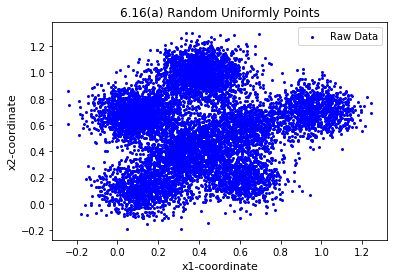

In [14]:
x1s = [g_query_pts[:, 0]]
x2s = [g_query_pts[:, 1]]
myplot.plt_plot(x1s, x2s, 'scatter', ['b', 'r'], ['o', 'x'], ['Raw Data', 'Centers'], 
    title = '6.16(a) Random Uniformly Points', yscale = None, ylb = None, yub = None,
    xlb = None, xub = None, xlabel = 'x1-coordinate', ylabel = 'x2-coordinate',
    legends = ['+', '-'], legendx = None, legendy = None, marker_sizes=[4, 100])          


In [15]:
neighbors = brute_force(g_pts, g_query_pts)
neighbors2 = simple_branch_bound_approach(g_pts, g_query_pts, clusters, centers, radii)
check_consistencey(g_pts, neighbors, neighbors2)

It took 6.213414192199707 seconds for brute force approach
It took 5.63115382194519 seconds for Simple Branch and Bound Approach
There are total 0 type 1 calculations out of 10000 queries with 10 clusters
There are total 26657 type 2 calculations out of 10000 queries with 10 clusters
There should be no difference between the two approaches: 0


{}

In [16]:
q_pts = data.generate_gmm(means, covs, probs, N*10)
g_query_pts = np.empty((0,2))
for ix, gpts in q_pts.items():
    g_query_pts = np.vstack([g_query_pts, gpts])

neighbors = brute_force(g_pts, g_query_pts)
neighbors2 = simple_branch_bound_approach(g_pts, g_query_pts, clusters, centers, radii)
check_consistencey(g_pts, neighbors, neighbors2)

It took 63.992942810058594 seconds for brute force approach
It took 54.789546251297 seconds for Simple Branch and Bound Approach
There are total 0 type 1 calculations out of 10000 queries with 10 clusters
There are total 265805 type 2 calculations out of 10000 queries with 10 clusters
There should be no difference between the two approaches: 0


{}

#### Problem 6.16 (d) 

I probably will use the branch and bound technique when there are a lot of test points. Its performance is at least similar to brute-force method, but improve a lot when the data can be well separated into clusters. 

Also note, here we just did one-level partition, with recursive partition, we may improve the performance a lot better. 

This, however, hasn't taken into account the time spent to partition the data, which may take quite a while. 

#### Problem 6.17

According to exercise 6.8, assume we partition any cluster with more than $k$ points, so the smallest clusters have size of $k$ or less. If we split $m$ times, then we have $k=\frac{N}{2^m}$, i.e. $m=\log_2\frac{N}{k}$. By problem 6.15, when $p=\frac{1}{2}$, the expected time to find the nearest neighbor in a cluster with $N$ points is $T(N)=d(2-p)^m = d(\frac{N}{k})^{\log_2(2-p)} = d(\frac{N}{k})^{\log_23 - 1}$.

So for each of the 10-fold, it will cost $O(\frac{N}{10}d(\frac{N}{k})^{\log_23 - 1})$, with 10 folds, we have the total cost for a given $k$ as $O(Nd(\frac{N}{k})^{\log_23 - 1})$.

Sum over $k$ from 1 to $\frac{N+1}{2}$, we see that the total cost is $O(N^{\log_23}d)$, which is a lot faster than the brute force method.


#### Problem 6.18

* (a) Assume all data points fall into a unit ball in $d$-dimension. The probability of a point $x_i$ falls into the neighborhood of $x$, i.e. ball of size $r^d$ centered at $x$, is just $P(x_i \in r^d)=r^d$, so the expected number of neighbors is just $Nr^d$.

* (b) As $N$ grows, if $Nr^d \to \infty$, and $r \to 0$, it means the neighborhood of $x$ becomes infinitely small around $x$, but the number of points that contribute to the decision, i.e. $Nr^d$ grows to very large. So there are a lot of points contribute to the decision of $x$ using a very small neighborhood. This surely will include the $k$-nearest neighbors for $x$. 
According to Theorem 6.2, from problem (a) $k(N)=Nr^d \to \infty$ and $\frac{k(N)}{N} = r^d \to 0$, so the classifier approaches optimal.

* (c) We can choose $r=N^{-\frac{1}{2d}}$

#### Problem 6.19

Given the number of bumps $k$ and scale $r$:

1. Initialize $\mu_j$ using the greedy approach on page 16
2. Find the points that belong to each $\mu_j$
3. Compute $\mu_j$, $\Sigma_j$ using the points belong the center $j$
4. Calculate the features on the data points using $\mu, \Sigma$.
5. Apply linear model to find out the weights $w$
6. Compute the in-sample error $E_{in}$
7. If $E_{in}$ is within certain tolerance, stop. 
8. Otherwise, goto step 2 and repeat

#### Problem 6.20

* (a) To penalize $h$ to be too curvy or wiggly, we can select $a_k$ to be inverse of the bounds of the derivatives of $h$. 

* (b)

\begin{align*}
E_{aug}(h) &= \int^{\infty}_{-\infty}dx \left[\sum^N_{i=1}(h(x)-y_i)^2\delta(x-x_i) + \lambda \sum^{\infty}_{k=0} a_k \left(h^{(k)}(x)\right)^2\right]\\
&= \sum^N_{i=1} \int^{\infty}_{-\infty}dx (h(x)-y_i)^2\delta(x-x_i) + \lambda \sum^{\infty}_{k=0} a_k \int^{\infty}_{-\infty}dx\left(h^{(k)}(x)\right)^2\\
&= \sum^N_{i=1} (h(x_i)-y_i)^2 + \lambda \sum^{\infty}_{k=0} a_k \int^{\infty}_{-\infty}dx\left(h^{(k)}(x)\right)^2\\
\end{align*}

Let's compute the variations


\begin{align*}
\delta E_{aug}(h) &= E_{aug}(h+\delta h) - E_{aug}(h) \\
&= \int^{\infty}_{-\infty}dx \left[\sum^N_{i=1}(h+ \delta h-y_i)^2\delta(x-x_i) - (h-y_i)^2\delta(x-x_i) + \lambda \sum^{\infty}_{k=0} a_k \left( \left((h+\delta h)^{(k)}\right)^2 - \left(h^{(k)}\right)^2 \right)\right]\\
&= \int^{\infty}_{-\infty}dx \left[\sum^N_{i=1}\delta h(2h+ \delta h-2y_i)\delta(x-x_i) + \lambda \sum^{\infty}_{k=0} a_k \left( \left(h^{(k)}+\delta h^{(k)}\right)^2 - \left(h^{(k)}\right)^2 \right)\right]\\
&= \int^{\infty}_{-\infty}dx \left[\sum^N_{i=1}\delta h(2h+ \delta h-2y_i)\delta(x-x_i) + \lambda \sum^{\infty}_{k=0} a_k \left(2\delta h^{(k)}h^{(k)} + (\delta h^{(k)})^2\right)\right]\\
&\text{Ignore the terms of higher order than linear in }\delta h\\
&= \int^{\infty}_{-\infty}dx \left[\sum^N_{i=1}2\delta h(h-y_i)\delta(x-x_i) + \lambda \sum^{\infty}_{k=0} 2a_k \delta h^{(k)}h^{(k)}\right]\\
&= \int^{\infty}_{-\infty}dx 2\delta h\left[\sum^N_{i=1}(h-y_i)\delta(x-x_i)\right] + \lambda \sum^{\infty}_{k=0} 2a_k \int^{\infty}_{-\infty}dx  \delta h^{(k)}h^{(k)}\\
\end{align*}

We look at the integration in the second term, and integrate by parts:

\begin{align*}
\int^{\infty}_{-\infty}dx \delta h^{(k)}h^{(k)} &= \delta h^{(k-1)}h^{(k)}|^{\infty}_{-\infty} - \int^{\infty}_{-\infty}dx \delta h^{(k-1)}h^{(k+1)}\\
&= - \int^{\infty}_{-\infty}dx \delta h^{(k-1)}h^{(k+1)}\;\;\;\text{ Assume all boundary terms to 0}\\
&= \int^{\infty}_{-\infty}dx \delta h^{(k-2)}h^{(k+2)}\\
&= \dots\\
&= (-1)^k \int^{\infty}_{-\infty}dx \delta hh^{(2k)}\\
\end{align*}




Take this back into previous equation, and let $\delta E_{aug}(h)=0$, we have

\begin{align*}
\delta E_{aug}(h) &= \int^{\infty}_{-\infty}dx 2\delta h\left[\sum^N_{i=1}(h-y_i)\delta(x-x_i)\right] + \lambda \sum^{\infty}_{k=0} 2a_k \int^{\infty}_{-\infty}dx  \delta h^{(k)}h^{(k)}\\
&= \int^{\infty}_{-\infty}dx 2\delta h\left[\sum^N_{i=1}(h-y_i)\delta(x-x_i)\right] + \lambda \sum^{\infty}_{k=0} 2a_k (-1)^k \int^{\infty}_{-\infty}dx \delta h h^{(2k)}\\
&= \int^{\infty}_{-\infty}dx 2\delta h\left[\sum^N_{i=1}(h-y_i)\delta(x-x_i) + \lambda \sum^{\infty}_{k=0} a_k (-1)^k h^{(2k)}\right]\\
&= 0
\end{align*}

We conclude that the integrand has to be zero all the time, so we have
\begin{align*}
\sum^N_{i=1}(h(x)-y_i)\delta(x-x_i) + \lambda \sum^{\infty}_{k=0}(-1)^k a_k  h^{(2k)}(x) = 0
\end{align*}


* (c) Looks like there's an error in the text problem (c), where $L$ should be $L=\sum^{\infty}_{k=0}(-1)^ka_k \frac{d^{2k}}{dx^{2k}}$ 

If we choose $h(x) = \sum^N_{i=1}w_iG(x,x_i)$, then we have 

\begin{align*}
\lambda \sum^{\infty}_{k=0}(-1)^ka_k h^{(2k)}(x) &= \lambda \sum^{\infty}_{k=0}(-1)^ka_k \sum^N_{i=1}w_iG^{(2k)}(x,x_i)  \\
&= \lambda \sum^N_{i=1} w_i \sum^{\infty}_{k=0}(-1)^ka_k G^{(2k)}(x,x_i)  \\
&= \lambda \sum^N_{i=1} w_i LG(x,x_i)  \\
&= \lambda \sum^N_{i=1} w_i \delta(x-x_i)  \\
\end{align*}

Take this back into the stationarity condition, we have

\begin{align*}
\sum^N_{i=1}(h(x)-y_i)\delta(x-x_i) + \lambda \sum^{\infty}_{k=0}(-1)^k a_k  h^{(2k)}(x) &= \sum^N_{i=1}(h(x)-y_i)\delta(x-x_i) + \lambda \sum^N_{i=1} w_i \delta(x-x_i)\\
&=\sum^N_{i=1}\left[(h(x)-y_i)+\lambda w_i\right]\delta(x-x_i)\\
&= 0\\
\end{align*}

It's easy to see that the stationary condition has $N$ conditions at each of $x=x_i$ points, i.e. 

\begin{align*}
h(x_1) - y_1 + \lambda w_1 &= 0 \\
\dots \\
h(x_i) - y_i + \lambda w_i &= 0\\
\dots \\
h(x_N) - y_N + \lambda w_N &= 0 \\
\end{align*}

Take $h(x_i) = \sum^N_{j=1} w_jG(x_i, x_j)$, we obtain a matrix equation

\begin{align*}
(G+\lambda I)w = y\\
w = (G+\lambda I)^{-1}y\\
\end{align*}

* (d) Since $LG(x,x')=\delta(x-x')$, apply Fourier transform on both sides, we have

\begin{align*}
\int^{\infty}_{-\infty}dx e^{2\pi i fx} LG(x,x') &= \int^{\infty}_{-\infty}dx e^{2\pi i fx}\sum^{\infty}_{k=0}(-1)^ka_k G^{(2k)}(x)\\
&=\sum^{\infty}_{k=0}(-1)^ka_k \int^{\infty}_{-\infty}dx e^{2\pi i fx}G^{(2k)}(x)\\
&=\sum^{\infty}_{k=0}(-1)^ka_k \left[e^{2\pi i fx}G^{(2k-1)}(x)|^{\infty}_{-\infty} - (2\pi i f)\int^{\infty}_{-\infty}dx e^{2\pi i fx}G^{(2k-1)}(x,x')\right]\\
&\text{ Assume that the boundary terms vanish, we have}\\
&=\sum^{\infty}_{k=0}(-1)^ka_k \left[- (2\pi i f)\int^{\infty}_{-\infty}dx e^{2\pi i fx}G^{(2k-1)}(x,x')\right]\\
&= \dots \\
&=\sum^{\infty}_{k=0}(-1)^ka_k \left[(-1)^{2k}(2\pi i f)^{2k}\int^{\infty}_{-\infty}dx e^{2\pi i fx}G(x,x')\right]\\
&=\sum^{\infty}_{k=0}(-1)^ka_k \left[(-1)^k(2\pi f)^{2k}\int^{\infty}_{-\infty}dx e^{2\pi i fx}G(x,x')\right]\\
&=\sum^{\infty}_{k=0}a_k (2\pi f)^{2k}\left[\int^{\infty}_{-\infty}dx e^{2\pi i fx}G(x,x')\right]\\
\end{align*}

The right hand side Fourier transformation is equal to $\int^{\infty}_{-\infty}dx e^{2\pi i fx}\delta(x-x') = e^{2\pi i fx'}$, so we have

\begin{align*}
\int^{\infty}_{-\infty}dx e^{2\pi i fx}G(x,x') &= \frac{e^{2\pi i fx'}}{\sum^{\infty}_{k=0}a_k (2\pi f)^{2k}}\\
\end{align*}

The left side is just the Fourier transform of $G(x,x')$, apply inverse Fourier transform on both sides, we obtain

\begin{align*}
G(x,x') &= \int^{\infty}_{-\infty}df e^{-2\pi i fx}\frac{e^{2\pi i fx'}}{\sum^{\infty}_{k=0}a_k (2\pi f)^{2k}}\\
&= \int^{\infty}_{-\infty}df \frac{e^{2\pi i f(x'-x)}}{Q(f)}\\
\end{align*}

Where $Q(f) = \sum^{\infty}_{k=0}a_k (2\pi f)^{2k}$

If we choose $a_k = \frac{1}{2^kk!}$, then we have $Q(f) = \sum^{\infty}_{k=0}\frac{1}{2^kk!} (2\pi f)^{2k} = \sum^{\infty}_{k=0}\frac{(2\pi f)^{2k}}{2^kk!} = \sum^{\infty}_{k=0}\frac{(2\pi^2 f^2)^{k}}{k!} = e^{2\pi^2 f^2}$

In this case, we have $G(x,x') = \int^{\infty}_{-\infty}df \frac{e^{2\pi i f(x'-x)}}{Q(f)} = \int^{\infty}_{-\infty}df e^{2\pi i f(x'-x) - 2\pi^2 f^2} = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x-x')^2}$

by using formula $\int^{\infty}_{-\infty}dt e^{-at^2+bt} = \sqrt{\pi}{a}e^{\frac{b^2}{4a}}$ where $a=2\pi^2, b=2\pi i (x' -x)$

#### Problem 6.21

* (a) Suppose we have $y_n = 1, -1$ for classification. If $y_n\left(w_0 + \sum^N_{i=1}w_id(x_n,x_i\right) \ge 1$, then the term in the brackets has the same sign as $y_n$,which indicatest that $h(x_n) = y_n$. If this is true for all $x_n$, then we find a solution $w$ such that $h(x_n)=y_n,\;for\; n=1,\dots,N$. By minimizing $\sum^N_{i=1}|w_i|$ (not sure why the problem has $i=0$ there?), we expect to have less overfitting because we regularize the magnitude of weights. 

* (b) If we add the slack variables $\zeta_n \ge 0$, instead of requiring $h(x_n)$ to be either $1$ or $-1$, we allow them to be less than 1 but still larger than 0, but let $y_n\left(w_0 + \sum^N_{i=1}w_id(x_n,x_i)\right) \ge 1-\zeta_n$ and $\zeta_n \ge 0$. We want to minize the in-sample error, which is smaller when $\zeta_n$ is smaller. So we minimize $\sum^N_{n=1}|w_n| + C\sum^N_{n=1}\zeta_n$

#### Problem 6.22

We can just let $|w_n|= \alpha_n$, and add the constraints $-\alpha_n \le w_n \le \alpha_n$. The constraints can be written as such:

\begin{align*}
-\alpha_n - w_n &\le 0\\
-\alpha_n + w_n &\le 0\\
-y_n\left(w_0 + \sum^N_{i=1}w_id(x_n,x_i)\right) - \zeta_n&\le -1\\
-\zeta_n &\le 0 \\
\end{align*}

We can re-write the minimization in problem 6.21(b) as:

\begin{align*}
\min_z c^Tz \\
\text{subject to}\; Az\le b\\
\end{align*}

Where $z=\begin{bmatrix}\alpha_1 \\ \dots \\ \alpha_N \\ w_1 \\ \dots \\ w_N \\ \zeta_1 \\ \dots \\ \zeta_N \end{bmatrix}$

And $c = \begin{bmatrix}1 & \dots & 1 & 0 & \dots & 0 & C & \dots & C \end{bmatrix}$

The matrix $A$ should be easy to write out.

#### Problem 6.23

To find the optimal decision rule, we specify a 0-1 loss function $L(y(\mathbf{x}), f(\mathbf{x}))$, where $L(y, f) = 0$ if $y(\mathbf{x}) = f(\mathbf{x})$, otherwise $L(y,f)=1$.

We compute the Expected Prediction Error (EPE) for any function $f(\mathbf{x})$, so we have

\begin{align*}
EPE &= E_{P(\mathbf{x}, y)}\left[L(y, f)\right]\\
&= E_{\mathbf{x}}E_{P(y|\mathbf{x})}\left[L(y, f)\right]\\
\end{align*}

It's suffice to minimize the EPE pointwise, i.e. minimize $E_{P(y|\mathbf{x})}\left[L(y, f)\right]$ w.r.t. $f$. We have

\begin{align*}
E_{P(y|\mathbf{x})}\left[L(y, f)\right] &= L(+1, f)P(y=+1|\mathbf{x}) +  L(-1, f)P(y=-1|\mathbf{x})\\
\end{align*}

Note, $f$ can only be $+1$ or $-1$, suppose $f=g$, where $g$ is $+1$ or $-1$.

\begin{align*}
E_{P(y|\mathbf{x})}\left[L(y, f)\right] &= L(+1, f)P(y=+1|\mathbf{x}) +  L(-1, f)P(y=-1|\mathbf{x})\\
&= L(+1, g)P(y=+1|\mathbf{x}) +  L(-1, g)P(y=-1|\mathbf{x})\\
&= 1- P(y=g|\mathbf{x})\\
\end{align*}

To minimize EPE, we need have $g$ that maximizes $P(y=g|\mathbf{x})$, thus $f=\text{argmax}P(y=g|\mathbf{x})$

That is $f=1$ if $P(+1|\mathbf{x}) > P(-1|\mathbf{x})$, else $f=-1$.

We can set $f=\text{sign}\left(P(+1|\mathbf{x}) - P(-1|\mathbf{x})\right)$

With GMM, we have 

\begin{align*}
P(+1|\mathbf{x}) &= \frac{P(\mathbf{x}, y=1)}{P(\mathbf{x})} \\
&= \frac{\sum^k_{j=1}p_j\mathcal{N}(\mu_j;\Sigma_j)\pi_j}{P(\mathbf{x})} \\
P(-1|\mathbf{x}) &= \frac{P(\mathbf{x}, y=-1)}{P(\mathbf{x})} \\
&= \frac{\sum^k_{j=1}p_j\mathcal{N}(\mu_j;\Sigma_j)(1-\pi_j)}{P(\mathbf{x})} \\
\end{align*}

Since $P(\mathbf{x})$ is also positive, we have 
\begin{align*}
f &= \text{sign}\left(\sum^k_{j=1}p_j\mathcal{N}(\mu_j;\Sigma_j)\pi_j - \sum^k_{j=1}p_j\mathcal{N}(\mu_j;\Sigma_j)(1-\pi_j)\right)\\
&= \text{sign}\left(\sum^k_{j=1}p_j(2\pi_j-1)\mathcal{N}(\mu_j;\Sigma_j)\right)\\
&= \text{sign}\left(\sum^k_{j=1}w_j\mathcal{N}(\mu_j;\Sigma_j)\right)\\
&= \text{sign}\left(\sum^k_{j=1}w_je^{-\frac{1}{2}(\mathbf{x}-\mu_j)^T\Sigma^{-1}_j(\mathbf{x}-\mu_j)}\right)\\
\end{align*}

#### Problem 6.24


In [51]:
def generate_data_624(N, min1, max1, min2, max2, do_plot=True):
    dim = 1
    max_v = 100000
    pts1 = data.generate_random_numbers(N, dim, max_v, min1, max1)
    pts2 = data.generate_random_numbers(N, dim, max_v, min2, max2)
    pts = np.hstack([pts1, pts2])

    if do_plot:
        x1s = [pts[:, 0]]
        x2s = [pts[:, 1]]
        myplot.plt_plot(x1s, x2s, 'scatter', ['b', 'r'], ['o', 'x'], ['Raw Data', None], 
            title = '6.24(b) Random Uniformly Points', yscale = None, ylb = None, yub = None,
            xlb = None, xub = None, xlabel = 'x1-coordinate', ylabel = 'x2-coordinate',
            legends = ['+', '-'], legendx = None, legendy = None) 
    return pts

def run_lloyd(X, max_k):
    ks = np.arange(1, max_k + 1)
    Eins = []
    for k in ks:
        #print(f'---- k = {k}')
        centers, clusters, Ein = nn.lloyd_kmeans(X, k, iters = 10, tol = 1.0e-3)
        Eins.append(Ein)
    return ks, Eins

def calc_gap(eins1, eins2):
    gaps = []
    for e1, e2 in zip(eins1, eins2):
        gaps.append(np.log(e2)-np.log(e1))
    return gaps

def generate_gaussian(mean, var, num=1):
    # Covariance for Gaussian
    cov = np.array([[var,0], [0, var]])
    g_num = np.random.multivariate_normal(mean, cov, num)
    return g_num 

<Figure size 432x288 with 0 Axes>

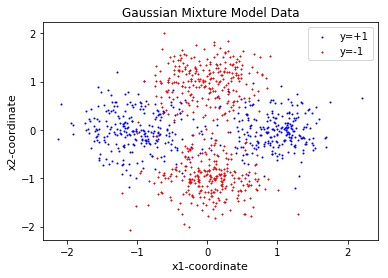

<Figure size 432x288 with 0 Axes>

In [52]:
N=1000
df = generate_data_613(N, do_plot=True)
plt.figure()

Range for x1-axis: [-2.489044609022109, 2.3799065052301325]
Range for x2-axis: [-2.2821725669832, 1.9581883754147364]


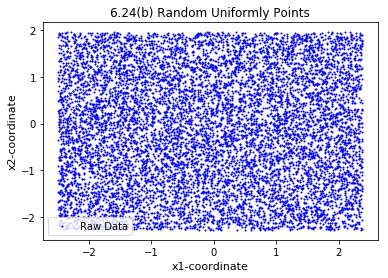

In [39]:
N = 10000
dim = 1
max_v = 100000
min1, max1 = np.min(df['x1'].values), np.max(df['x1'].values)
min2, max2 = np.min(df['x2'].values), np.max(df['x2'].values)
print(f'Range for x1-axis: [{min1}, {max1}]')
print(f'Range for x2-axis: [{min2}, {max2}]')
ranX = generate_data_624(N, min1, max1, min2, max2, do_plot=True)

In [40]:
# Lloyd on 4-Center GMM
X = df[['x1', 'x2']].values
max_k = 10
ks, eins = run_lloyd(X, max_k)

In [41]:
## Lloyd on Randomly Uniform numbers

r_eins = np.zeros(max_k)
tot_iters = 5
for m in range(tot_iters):
    ranX = generate_data_624(N, min1, max1, min2, max2, do_plot=False)
    r_ks1, r_eins1 = run_lloyd(ranX, max_k)
    r_eins += np.array(r_eins1)

r_eins = r_eins/tot_iters

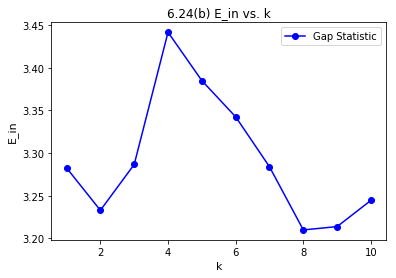

In [42]:
gaps = calc_gap(eins, r_eins)
xs = [ks]
ys = [gaps]
myplot.plt_plot(xs, ys, 'plot', ['b', 'y', 'r'], ['o', 'o', 'x'], ['Gap Statistic'], 
    title = '6.24(b) E_in vs. k', yscale = None, ylb = None, yub = None,
    xlb = None, xub = None, xlabel = 'k', ylabel = 'E_in',
    legends = ['', '', ''], legendx = None, legendy = None) 

#### Problem 6.24 (d) 

The gap statistic is computed as the logrithm of the ratio between $E_{in}$s of randomly generated numbers with 4-Center GMM numbers. As the data points from randomly generated uniform numbers have no well defined centers. When the gap is at maximum, that means the difference between no well defined center and the k-means are the largest, this indicates that $k$ is the optimal one that distinguishes the centers well. 

At $k=4$, I have the gap is maximum. This agrees with the 4 centers GMM we used to generate the data points.

#### Problem 6.24 (e)

As we increase the $\sigma$ used to generate the GMM data, we see the optimal $k$ decreased from 4 to 1, this is probably because when $\sigma$ is large, the data is no longer well centered. So it's like purely random data. See the example below when $\sigma^2 = 0.3$.

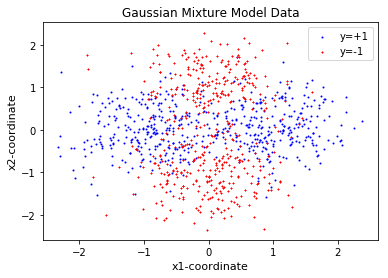

In [3]:
df0 = generate_data_613(N, do_plot=True, var = 0.3)

------ Computing var = 0.01
------ Computing var = 0.05
------ Computing var = 0.1
------ Computing var = 0.15
------ Computing var = 0.2
------ Computing var = 0.3
------ Computing var = 0.4
------ Computing var = 0.5
------ Computing var = 1


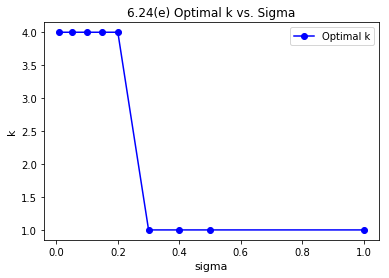

In [2]:
vars = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 1]
N=1000
max_v = 100000
max_k = 10
opt_ks = []
for var in vars:
    print(f'------ Computing var = {var}')
    df = generate_data_613(N, do_plot=False, var = var)
    min1, max1 = np.min(df['x1'].values), np.max(df['x1'].values)
    min2, max2 = np.min(df['x2'].values), np.max(df['x2'].values)
    ranX = generate_data_624(N, min1, max1, min2, max2, do_plot=False)
    X = df[['x1', 'x2']].values

    ks, eins = run_lloyd(X, max_k)
    r_ks1, r_eins = run_lloyd(ranX, max_k)
    gaps = calc_gap(eins, r_eins)
    opt_k = ks[np.argmax(gaps)]
    opt_ks.append(opt_k)
    
xs = [vars]
ys = [opt_ks]
myplot.plt_plot(xs, ys, 'plot', ['b', 'y', 'r'], ['o', 'o', 'x'], ['Optimal k'], 
    title = '6.24(e) Optimal k vs. Sigma', yscale = None, ylb = None, yub = None,
    xlb = None, xub = None, xlabel = 'sigma', ylabel = 'k',
    legends = ['', '', ''], legendx = None, legendy = None)     

#### Problem 6.25

* (a) We found the number of clusters are 4.
* (b) 

In [47]:
#### Problem 6.25 (e)

def find_optimal_l_625(N, var, tot_num, max_k, do_plot=True):
    df = generate_data_613(N, do_plot=False, var = var)
    mean = np.array([0,0])
    opt_ks = [4]
    newX = df[['x1', 'x2']].values
    ls = np.arange(1, tot_num)
    r_num = 3
    for n in ls:
        #print(f'--- Adding a total of {n} new data points ---')
        g_num = generate_gaussian(mean, var, num=1)
        newX = np.vstack([newX, g_num])
        #print(newX.shape)
        ks, eins = run_lloyd(newX, max_k)

        min1, max1 = np.min(newX[:, 0]), np.max(newX[:, 0])
        min2, max2 = np.min(newX[:, 1]), np.max(newX[:, 1])
        
        r_eins = np.zeros(max_k)
        for r in np.arange(r_num):
            ranX = generate_data_624(N+n, min1, max1, min2, max2, do_plot=False)
            _, r_eins1 = run_lloyd(ranX, max_k)
            r_eins += np.array(r_eins1)
            
        r_eins = r_eins/r_num
        gaps = calc_gap(eins, r_eins)
        opt_k = ks[np.argmax(gaps)]
        #print(f'--- Number of clusters: {opt_k}')
        opt_ks.append(opt_k)

    # Find the optimal l
    if np.sum(np.diff(opt_ks)>0) > 0:
        opt_l = ls[np.diff(opt_ks) > 0][0]
    else:
        opt_l = tot_num+1

    if do_plot:
        xs = [np.arange(tot_num)[1:]]
        ys = [np.diff(opt_ks)]
        myplot.plt_plot(xs, ys, 'plot', ['b', 'y', 'r'], ['o', 'o', 'x'], ['Optimal k'], 
            title = '6.25(c) Incremental number of clusters vs. Number of new points', yscale = None, ylb = None, yub = None,
            xlb = None, xub = None, xlabel = 'Number of new points', ylabel = 'Increase of number of clusters',
            legends = ['', '', ''], legendx = None, legendy = None)
    return opt_l, opt_ks

--- Adding a total of 1 new data points ---
--- Number of clusters: 4
--- Adding a total of 2 new data points ---
--- Number of clusters: 4
--- Adding a total of 3 new data points ---
--- Number of clusters: 4
--- Adding a total of 4 new data points ---
--- Number of clusters: 4
--- Adding a total of 5 new data points ---
--- Number of clusters: 4
--- Adding a total of 6 new data points ---
--- Number of clusters: 4
--- Adding a total of 7 new data points ---
--- Number of clusters: 4
--- Adding a total of 8 new data points ---
--- Number of clusters: 4
--- Adding a total of 9 new data points ---
--- Number of clusters: 4
--- Adding a total of 10 new data points ---
--- Number of clusters: 4
--- Adding a total of 11 new data points ---
--- Number of clusters: 4
--- Adding a total of 12 new data points ---
--- Number of clusters: 4
--- Adding a total of 13 new data points ---
--- Number of clusters: 4
--- Adding a total of 14 new data points ---
--- Number of clusters: 4
--- Adding a to

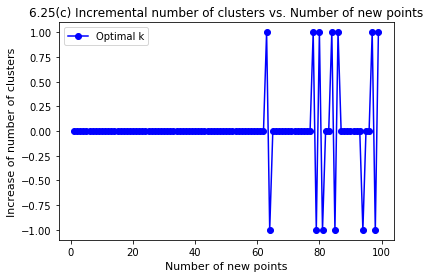

In [45]:
N=1000
max_v = 100000
max_k = 6
tot_num = 100
var = 0.15
opt_l, opt_ks = find_optimal_l_625(N, var, tot_num, max_k, do_plot=True)

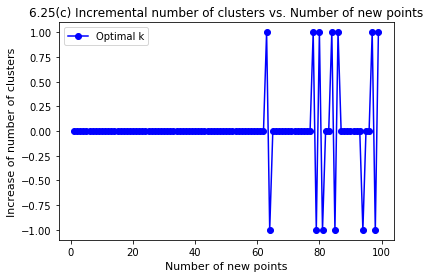

In [46]:
#### Problem 6.25 (c)
xs = [np.arange(tot_num)[1:]]
ys = [np.diff(opt_ks)]
myplot.plt_plot(xs, ys, 'plot', ['b', 'y', 'r'], ['o', 'o', 'x'], ['Optimal k'], 
    title = '6.25(c) Incremental number of clusters vs. Number of new points', yscale = None, ylb = None, yub = None,
    xlb = None, xub = None, xlabel = 'Number of new points', ylabel = 'Increase of number of clusters',
    legends = ['', '', ''], legendx = None, legendy = None)     

#### Problem 6.25 (d)

From the plot in problem 6.25 (c), we see that the number of data points need to identify the existence of the new center is about $l^* = 65$.

---Working for var = 0.01
---Working for var = 0.05
---Working for var = 0.1
---Working for var = 0.15
---Working for var = 0.2
---Working for var = 0.3
---Working for var = 0.5
---Working for var = 0.7
---Working for var = 1


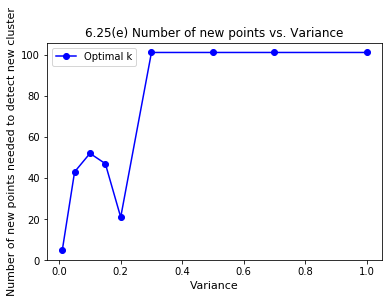

In [49]:
vars = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.7, 1]
N=1000
max_v = 100000
max_k =6
tot_num = 100
optls = []
for var in vars:
    print(f'---Working for var = {var}')
    opt_l, opt_ks = find_optimal_l_625(N, var, tot_num, max_k, do_plot=False)
    optls.append(opt_l)
    
xs = [vars]
ys = [optls]
myplot.plt_plot(xs, ys, 'plot', ['b', 'y', 'r'], ['o', 'o', 'x'], ['Optimal k'], 
    title = '6.25(e) Number of new points vs. Variance', yscale = None, ylb = None, yub = None,
    xlb = None, xub = None, xlabel = 'Variance', ylabel = 'Number of new points needed to detect new cluster',
    legends = ['', '', ''], legendx = None, legendy = None)         

In [50]:
optls

[5, 43, 52, 47, 21, 101, 101, 101, 101]

#### Problem 6.26 (e)

From the above grpah, we see that when variance is really small, i.e. 0.01, it takes only 5 data points to detect new cluster.  This is because all gaussians are well separated. When variance is smaller than 0.3, the number of data points needed to identify the new cluster is around 40-50 (The first time the number of cluster jumps). When variance is larger than 0.3, we don't see new cluster even with 100 points, it indicates that the points are mixed all together, there's no well defined centers as we saw in problem 6.25 (e), so adding points with large variance won't tell us information about new cluster. 



#### Problem 6.26

* Non-negativity: $0 \le |S_1 \cap S_2| \le |S_1 \cup S_2|$, so we have $0 \le J(S_1, S_2) \le 1$ and $d(S_1,S_2) \ge 0$

* Symmetry: Clearly $J(S_1, S_2) = J(S_2, S_1)$, so we have $d(S_1, S_2) = d(S_2, S_1)$

* Triangle Inequality: 

Note: This proof is directly from Ryan Moulton's answer at mathoverflow for question: [Is the Jaccard distance a distance?](https://mathoverflow.net/questions/18084/is-the-jaccard-distance-a-distance)

Assume the minhash function on a set $S$ is $H(S)$, so according to minHash, we have the probability that $H(S_1)=H(S_2)$ equals to the Jaccard similarity, i.e. $P[H(S_1)=H(S_2)] = J(S_1, S_2)$. 

We now have for a third set $S_3$, 

\begin{align*}
d(S_1,S_2) &= 1-J(S_1,S_2) \\
&= P[H(S_1)\ne H(S_2)] \\
&\le P[H(S_1)\ne H(S_3) \cup H(S_2)\ne H(S_3)] \\
&\le P[H(S_1)\ne H(S_3)] + P[H(S_2)\ne H(S_3)]\\
&= 1-J(S_1,S_3) + 1-J(S_2,S_3)\\
&= d(S_1,S_3) + d(S_2,S_3)\\
\end{align*}

#### Problem 6.27

The denominator in the equation for $P(x)$ is missing a square root. 

* (a) If $K=1$, we have $P(x)$ is composed of one Gaussian distribution, the maximum likelihood estimate of $\mu_1=\frac{1}{N}\sum^N_{i=1}x_i$, $\sigma^2_1$ is the standardization of $x_i$, i.e. $\sigma^2_1 = \frac{\sum^N_{i=1}(x_i - \mu_1)^2}{N}$

* (b) If $K>1$, $P(x) = \sum^K_{k=1}\frac{w_k}{\sqrt{2\pi}\sigma_k} \exp(-\frac{(x-\mu_k)^2}{2\sigma^2_k})$

By maximum likelihood, we have the likelihood 

\begin{align*}
\hat{P}(x_1,\dots,x_N) &= \prod^N_{n=1}\hat{P}(x_n) \\
&= \prod^N_{n=1} \left(\sum^K_{k=1}\frac{w_k}{\sqrt{2\pi}\sigma_k} \exp(-\frac{(x_n-\mu_k)^2}{2\sigma^2_k})\right)\\
\end{align*}

Take log on both sides, we have
\begin{align*}
\ln\hat{P}(x_1,\dots,x_N) &=\sum^N_{n=1} \ln\left(\sum^K_{k=1}\frac{w_k}{\sqrt{2\pi}\sigma_k} \exp(-\frac{(x_n-\mu_k)^2}{2\sigma^2_k})\right)\\
\end{align*}

It's clear that if one of $\sigma_k$ goes to zero and $\mu_k = x_n$, we have infinite likelihood.

* (c) If we initialize E-M algorithm with one point in some cluster, it'll make the likelihood infinite. So we shall make sure that all the initial clusters include more than one points.

* (d) 

  * (i) Compute the $P[x_n \in B_n]$
  
\begin{align*}
P[x_n \in B_n] &= \int^{x_n+\epsilon}_{x_n-\epsilon}P(x)dx \\
&= \int^{x_n+\epsilon}_{x_n-\epsilon} \sum^K_{k=1}\frac{w_k}{\sqrt{2\pi}\sigma_k} \exp(-\frac{(x-\mu_k)^2}{2\sigma^2_k}) dx \\
&= \sum^K_{k=1}w_k\int^{x_n+\epsilon}_{x_n-\epsilon} \frac{1}{\sqrt{2\pi}\sigma_k} \exp(-\frac{(x-\mu_k)^2}{2\sigma^2_k}) dx \\
&= \sum^K_{k=1}w_k \left(F_{\mathcal{N}}\left(\frac{x_n+\epsilon - \mu_k}{\sigma_k}\right) - F_{\mathcal{N}}\left(\frac{x_n-\epsilon - \mu_k}{\sigma_k}\right)\right) \\
\end{align*}

  * (ii) If for a fixed $\epsilon$, the difference in standard normal distribution is limited. so the maximum likelihood is now well defined.
  
\begin{align*}
\ln\hat{P}(x_1,\dots,x_N) &=\sum^N_{n=1} \ln\left( \sum^K_{k=1}w_k \left(F_{\mathcal{N}}\left(\frac{x_n+\epsilon - \mu_k}{\sigma_k}\right) - F_{\mathcal{N}}\left(\frac{x_n-\epsilon - \mu_k}{\sigma_k}\right)\right) \right)\\
\end{align*}

As $\epsilon \to 0$, it recovers the previous likelihood.

  * (iii) At the beginning of E-M algorithm, we need select a $\epsilon$ value, then we can proceed with the ordinary E-M algorithm. The optimal $\epsilon$ value can be found out using cross-validation.

#### Problem 6.28

* (a) $E_{out}(h) = E_{P(x,y)}\left[(h(x)-y)^2\right] = E_{P(x)}E_{P(y|x)}\left[(h(x)-y)^2\right]$, it's suffice to minimize the $E_{P(y|x)}\left[(h(x)-y)^2\right] = \int (h(x)-y)^2dP(y|x)$, take derivative w.r.t. $h(x)$, and set to 0, we have $\int h(x) dP(y|x) = \int y dP(y|x) = E_{P(y|x)}[y]$, where the left side equals to $h(x)$ since we fixed $x$ and $\int dP(y|x) = 1$.

So we have the optimal function $f = E_{P(y|x)}[y] = E_{P(x,y)}[y|x]$

* (b) let $s_k = \mathbf{x} - \alpha_k$ and $t_k = y - \beta_k$, so we have $z-\mu_k = \begin{bmatrix}s_k \\ t_k\end{bmatrix}$. We can compute $P(y|\mathbf{x}) = \frac{P(\mathbf{z})}{P(\mathbf{x})}$. Note we have $\mathbf{x}$ with dimension $d\times 1$, $\mathbf{z}$ with dimension $(d+1)\times 1$, $A_k$ with dimension $d\times d$, $b_k$ is $d\times 1$ and $c_k, y, \beta_k, t_k$ are scalars.

Where the margin probability:

\begin{align*}
P(\mathbf{x}) &= \int P(\mathbf{z})dy\\
&= \int \sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}} e^{-\frac{1}{2}(\mathbf{z}-\mu_k)^TS_k(\mathbf{z}-\mu_k)} dy\\
&= \sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}} \int  e^{-\frac{1}{2}(\mathbf{z}-\mu_k)^TS_k(\mathbf{z}-\mu_k)} dy\\
&= \sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}} \int  e^{-\frac{1}{2}(c_kt^2 + 2s^T_kb_kt_k + s^T_kA_ks_k)} dt_k\\
&= \sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}}e^{-\frac{1}{2}s^T_kA_ks_k} \int  e^{-\frac{1}{2}(c_kt^2_k + 2s^T_kb_kt_k)} dt_k\\
&\text{Note that }\; t_k \; \text{is a scalar, apply the formula from problem 6.20(d)}\; \int dt e^{-at^2+bt}=\sqrt{\frac{\pi}{a}}e^{\frac{b^2}{4a}}\\
&= \sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}}e^{-\frac{1}{2}s^T_kA_ks_k} \sqrt{\frac{2\pi}{c_k}}e^{\frac{s^T_kb_kb^T_ks_k}{2c_k}}\\
&= \sum^K_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}\\
\end{align*}

Where $\hat{w}_k =w_k \sqrt{ \frac{|S_k|}{(2\pi)^dc_k} }$ and $\Omega_k = A_k - \frac{b_kb^T_k}{c_k}$

We can now compute the expectation $g(\mathbf{x}) = E[y|\mathbf{x}] = \int yP(y|\mathbf{x})dy$

\begin{align*}
E[y|\mathbf{x}] &= \int yP(y|\mathbf{x})dy \\
&= \int y \frac{P(\mathbf{z})}{P(\mathbf{x})}dy\\
&= \frac{1}{P(\mathbf{x})}\int \sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}} y e^{-\frac{1}{2}(\mathbf{z}-\mu_k)^TS_k(\mathbf{z}-\mu_k)} dy\\
&= \frac{1}{P(\mathbf{x})}\sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}} \int  y e^{-\frac{1}{2}(\mathbf{z}-\mu_k)^TS_k(\mathbf{z}-\mu_k)} dy\\
&= \frac{1}{P(\mathbf{x})}\sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}} e^{-\frac{1}{2}s^T_kA_ks_k} \int  (t_k+\beta_k)e^{-\frac{1}{2}(c_kt^2_k + 2s^T_kb_kt_k)}dt_k\\
\end{align*}

Notice that 

\begin{align*}
\int  (-c_kt_k - s^T_kb_k )e^{-\frac{1}{2}(c_kt^2_k + 2s^T_kb_kt_k)}dt_k &= e^{-\frac{1}{2}(c_kt^2_k + 2s^T_kb_kt_k)}|^{\infty}_{-\infty}
&= 0\\
\end{align*}

We find that 
\begin{align*}
\int  t_ke^{-\frac{1}{2}(c_kt^2_k + 2s^T_kb_kt_k)}dt_k &= - \frac{s^T_kb_k}{c_k} \int e^{-\frac{1}{2}(c_kt^2_k + 2s^T_kb_kt_k)}dt_k
\end{align*}

So we have 

\begin{align*}
\int  (t_k+\beta_k)e^{-\frac{1}{2}(c_kt^2_k + 2s^T_kb_kt_k)}dt_k &= (\beta_k- \frac{s^T_kb_k}{c_k}) \int e^{-\frac{1}{2}(c_kt^2_k + 2s^T_kb_kt_k)}dt_k\\
&= (\beta_k- \frac{s^T_kb_k}{c_k})\sqrt{\frac{2\pi}{c_k}}e^{\frac{s^T_kb_kb^T_ks_k}{2c_k}}\\
\end{align*}

Take this into the equation for $E[y|\mathbf{x}]$  we have

\begin{align*}
E[y|\mathbf{x}] &= \frac{1}{P(\mathbf{x})}\sum^K_{k=1} \frac{w_k|S_k|^{\frac{1}{2}}}{(2\pi)^{\frac{d+1}{2}}} e^{-\frac{1}{2}s^T_kA_ks_k}  (\beta_k- \frac{s^T_kb_k}{c_k})\sqrt{\frac{2\pi}{c_k}}e^{\frac{s^T_kb_kb^T_ks_k}{2c_k}}\\
&=  \frac{1}{P(\mathbf{x})} \sum^K_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}(\beta_k- \frac{s^T_kb_k}{c_k})\\
&= \frac{\sum^K_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}(\beta_k- \frac{s^T_kb_k}{c_k})}{\sum^K_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}}\\
\end{align*}

This functional form can be interpreted as a RBF, where we have $\Phi(|x-\alpha_k|) = \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}  = \hat{w}_ke^{-\frac{1}{2}(x-\alpha_k)^T\Omega_k(x-\alpha_k)}$ with weights $v_k = \frac{\beta_k- \frac{s^T_kb_k}{c_k}}{\sum^K_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}}$ such that

$E[y|\mathbf{x}] = \sum^K_{k=1}v_k\Phi(x-\alpha_k)$

Note the weights are also a function of $x-\alpha_k$

* (c) If we use non-parametric Parzen windows with spherical Gaussian kernel to estimate $P(\mathbf{x}, y)$, then we have

\begin{align*}
P(\mathbf{z}) &= P(\mathbf{x}, y) \\
&= \frac{1}{Nr^{d+1}}\sum^N_{k=1}\Phi\left(\frac{|z-z_k|}{r}\right)\\
\end{align*}


Where $\Phi(z) = \frac{1}{(2\pi)^\frac{d+1}{2}}e^{-\frac{1}{2}z^2}$

Compare with the function for $P(\mathbf{z})$ we see that 

\begin{align*}
K &= N\\
\mu_k &= \begin{bmatrix} x_k \\ y_k \end{bmatrix}\\
c_k &= \frac{1}{r^2}\\
A_k &=\frac{1}{r^2}I \\
b_k &= 0 \\
S_k &= \frac{1}{r^2}\begin{bmatrix} I & 0\\0 & 1 \end{bmatrix}\\
|S_k| &= \frac{1}{r^2} \\
w_k &= \frac{1}{Nr^d}\\
\end{align*}

From previous derivation, we have
\begin{align*}
\hat{w}_k &=w_k \sqrt{ \frac{|S_k|}{(2\pi)^dc_k} }\\
&= \frac{1}{Nr^{d+1}(2\pi)^{\frac{d}{2}}}\\
\Omega_k &= A_k - \frac{b_kb^T_k}{c_k} \\
&= \frac{1}{r^2}I\\
\end{align*}

So we have through problem (b), that 

\begin{align*}
g(\mathbf{x}) &= E[y|\mathbf{x}] \\
&= \frac{\sum^K_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}(\beta_k- \frac{s^T_kb_k}{c_k})}{\sum^K_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}}\\
&= \frac{\sum^N_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}y_k}{\sum^N_{k=1} \hat{w}_ke^{-\frac{1}{2}s^T_k\Omega_ks_k}}\\
&= \frac{\sum^N_{k=1} \hat{w}_ke^{-\frac{1}{2r^2}|x-x_k|^2} y_k}{\sum^N_{k=1} \hat{w}_ke^{-\frac{1}{2r^2}|x-x_k|^2}}\\
&= \frac{\sum^N_{k=1} e^{-\frac{1}{2r^2}|x-x_k|^2} y_k}{\sum^N_{k=1} e^{-\frac{1}{2r^2}|x-x_k|^2}}\\
\end{align*}

Where the last step is because $\hat{w}_k$ is constant, i.e. not related to $k$

This is an RBF.